# BASIC WEATHER ANALYSIS START

In [1]:
import pandas as pd
from dateutil import tz
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')

In [2]:
weather = pd.read_csv('Jan_2008__Aug_2023_weather_data.csv')
neg_temp_cond = weather['temp'] < 0
weather = weather.loc[~neg_temp_cond] # getting rid of observation where weather is negative temperature (-18000)

In [3]:
weather.shape

(137039, 28)

In [4]:
weather.columns

Index(['dt', 'dt_iso', 'timezone', 'city_name', 'lat', 'lon', 'temp',
       'visibility', 'dew_point', 'feels_like', 'temp_min', 'temp_max',
       'pressure', 'sea_level', 'grnd_level', 'humidity', 'wind_speed',
       'wind_deg', 'wind_gust', 'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h',
       'clouds_all', 'weather_id', 'weather_main', 'weather_description',
       'weather_icon'],
      dtype='object')

In [5]:
weather['temp'].describe()

count    137039.000000
mean         66.436397
std          17.687472
min           0.120000
25%          53.380000
50%          68.430000
75%          79.990000
max         109.170000
Name: temp, dtype: float64

Almost no difference between actual temp and feels like

In [6]:
(weather['temp'] - weather['feels_like']).describe()

count    137039.000000
mean         -0.067717
std           3.909013
min         -12.600000
25%          -1.280000
50%           0.020000
75%           1.940000
max          12.600000
dtype: float64

In [7]:
def utc_to_cst_timestamp_string(ts):
    from_zone = tz.gettz('UTC')
    to_zone = tz.gettz('America/Chicago')
    json_data = {'time': str(ts)}
    utc = datetime.strptime(json_data['time'], '%Y-%m-%d %H:%M:%S +0000 UTC')
    utc = utc.replace(tzinfo=from_zone)
    cst = utc.astimezone(to_zone)
    date_time = cst.strftime("%Y-%m-%d %H:%M:%S")
    return date_time

In [8]:
weather['cst_timestamp'] = weather['dt_iso'].apply(lambda x: utc_to_cst_timestamp_string(x))
weather['date'] = weather['cst_timestamp'].apply(lambda x: x.split(' ')[0])
weather['time'] = weather['cst_timestamp'].apply(lambda x: x.split(' ')[1])

In [9]:
summer_2023 = weather[weather['date'] >= '2023-05-01']
max_weather = summer_2023.groupby('date')['temp'].max()

Local N day average calculation

In [10]:
three_day_average = max_weather.groupby(np.arange(len(max_weather))//3).mean()
three_day_average.index = [max_weather.index[i] for i in range(0, max_weather.shape[0], 3)]

five_day_average = max_weather.groupby(np.arange(len(max_weather))//5).mean()
five_day_average.index = [max_weather.index[i] for i in range(0, max_weather.shape[0], 5)]

The blue line is the original weather signal, the purple line is the consecutive 5 day average

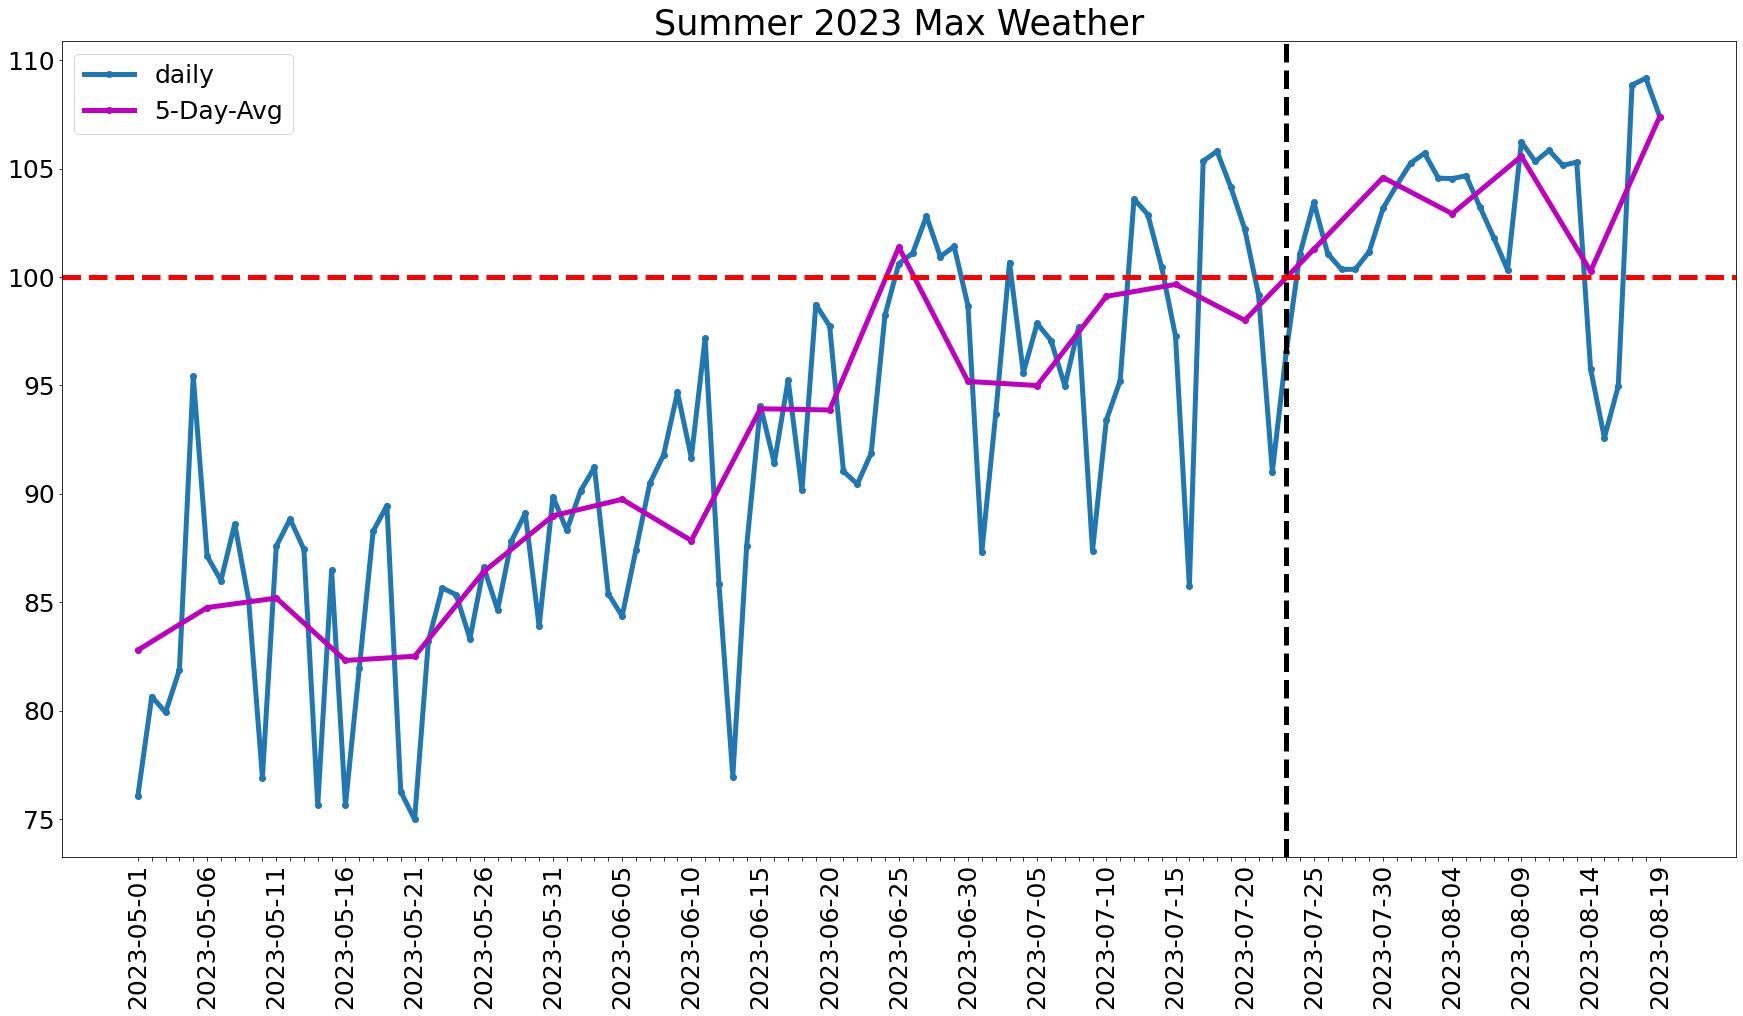

In [11]:
plt.rcParams["figure.figsize"] = (30, 15)
fig, ax = plt.subplots()

ax.plot_date(max_weather.index, max_weather, linestyle='solid', linewidth=5, label='daily')
ax.plot_date(five_day_average.index, five_day_average, linestyle='solid', linewidth=5, color='m', label='5-Day-Avg')
original_labels = [str(label) for label in ax.get_xticks()]
labels_of_interest = [str(i) for i in np.arange(0,len(original_labels),5)]
new_labels = [str(max_weather.index[int(label)]) if label in labels_of_interest else "" for label in original_labels]
ax.set_xticklabels(new_labels)
plt.xticks(rotation=90)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.title('Summer 2023 Max Weather', fontsize=35)
plt.axhline(y = 100, color = 'r', linestyle = 'dashed', linewidth=5)
plt.axvline(x = 83, color = 'k', linestyle = 'dashed', linewidth=5)
plt.legend(fontsize=25)
print()
print()
plt.show()
print()
print()
fig.savefig('Summer_2023_Max_Weather.png')

In [15]:
five_day_average.reset_index(drop=True)

,index,temp
0,2023-05-01,82.792
1,2023-05-06,84.754
2,2023-05-11,85.192
3,2023-05-16,82.314
4,2023-05-21,82.508
5,2023-05-26,86.414
6,2023-05-31,88.988
7,2023-06-05,89.748
8,2023-06-10,87.846
9,2023-06-15,93.924


In [16]:
five_day_average = five_day_average.reset_index(drop=True)
five_day_average = five_day_average.rename(columns={'temp':'2023'})
five_day_average['2022'] = five_day_average['2023'] - 10
five_day_average

,index,2023,2022
0,2023-05-01,82.792,72.792
1,2023-05-06,84.754,74.754
2,2023-05-11,85.192,75.192
3,2023-05-16,82.314,72.314
4,2023-05-21,82.508,72.508
5,2023-05-26,86.414,76.414
6,2023-05-31,88.988,78.988
7,2023-06-05,89.748,79.748
8,2023-06-10,87.846,77.846
9,2023-06-15,93.924,83.924


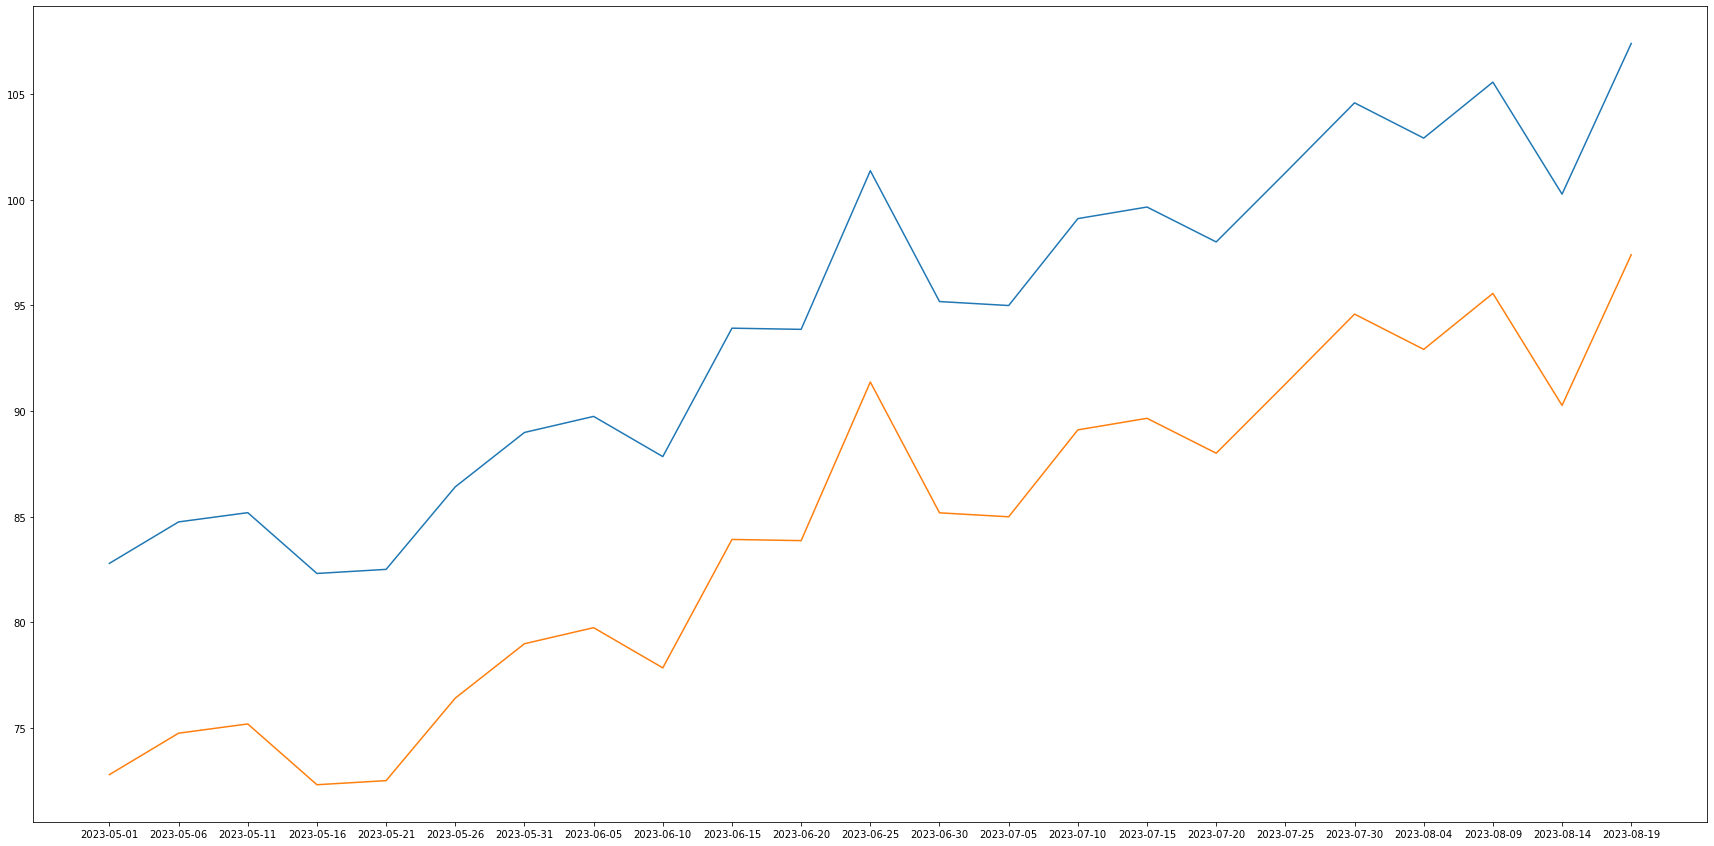

In [17]:
for year in five_day_average.columns[1:]:
    plt.plot(five_day_average['index'], five_day_average[year])

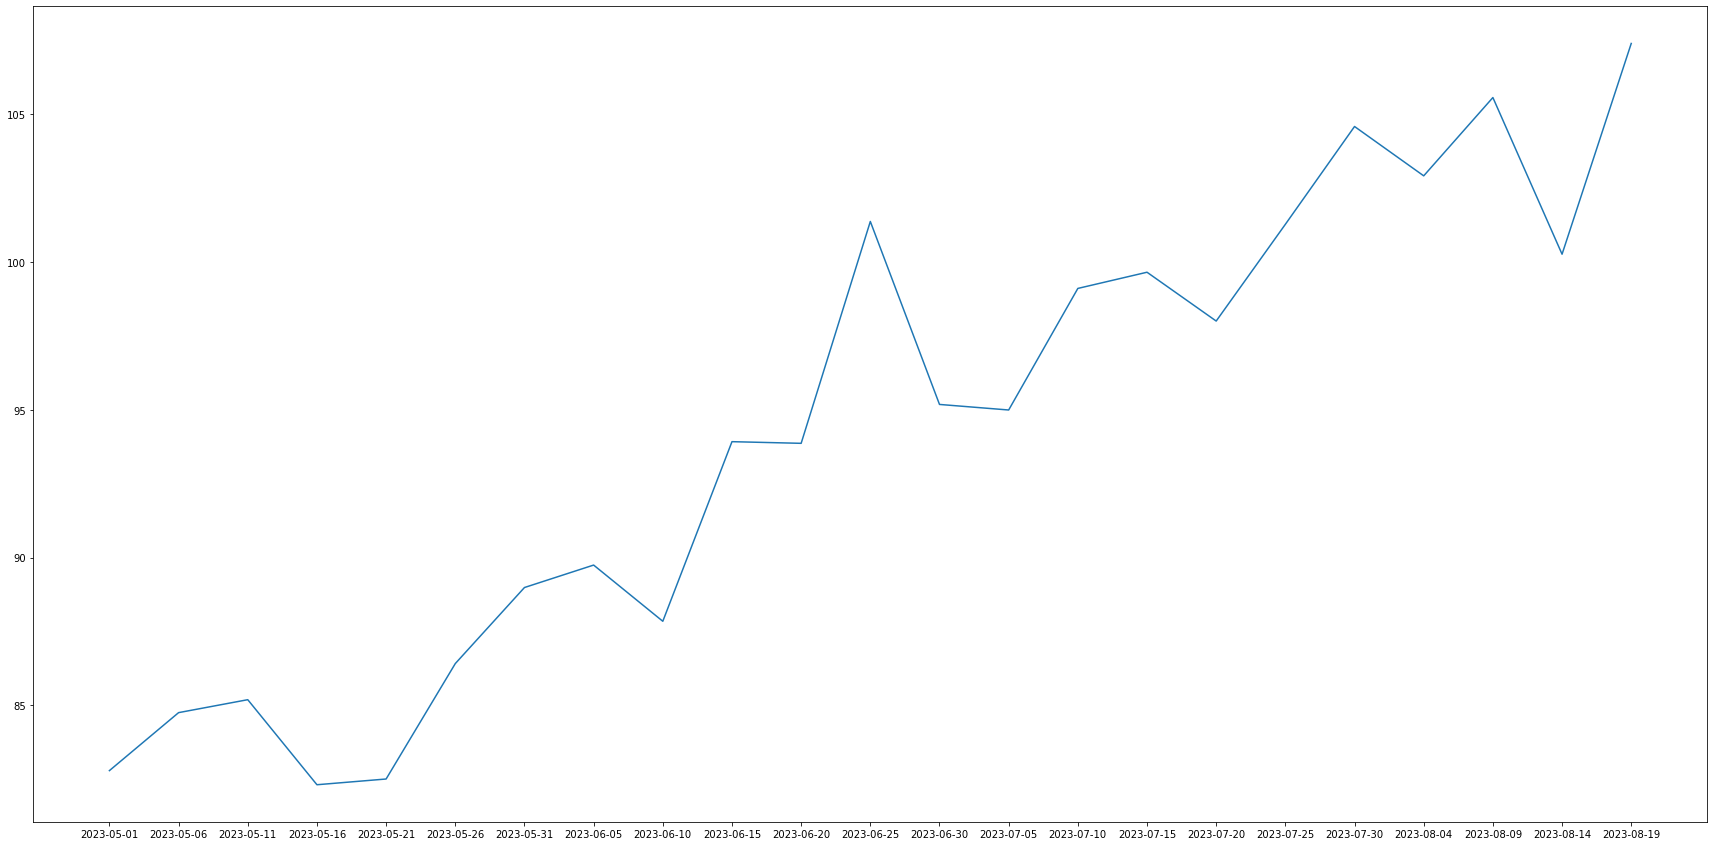

In [126]:
five_day_average = max_weather.groupby(np.arange(len(max_weather))//5).mean()
five_day_average.index = [max_weather.index[i] for i in range(0, max_weather.shape[0], 5)]
fig, ax = plt.subplots()
ax.plot(five_day_average.index, five_day_average)
plt.show()

In [118]:
new_labels

['2023-05-01',
 '',
 '',
 '',
 '',
 '2023-05-06',
 '',
 '',
 '',
 '',
 '2023-05-11',
 '',
 '',
 '',
 '',
 '2023-05-16',
 '',
 '',
 '',
 '',
 '2023-05-21',
 '',
 '',
 '',
 '',
 '2023-05-26',
 '',
 '',
 '',
 '',
 '2023-05-31',
 '',
 '',
 '',
 '',
 '2023-06-05',
 '',
 '',
 '',
 '',
 '2023-06-10',
 '',
 '',
 '',
 '',
 '2023-06-15',
 '',
 '',
 '',
 '',
 '2023-06-20',
 '',
 '',
 '',
 '',
 '2023-06-25',
 '',
 '',
 '',
 '',
 '2023-06-30',
 '',
 '',
 '',
 '',
 '2023-07-05',
 '',
 '',
 '',
 '',
 '2023-07-10',
 '',
 '',
 '',
 '',
 '2023-07-15',
 '',
 '',
 '',
 '',
 '2023-07-20',
 '',
 '',
 '',
 '',
 '2023-07-25',
 '',
 '',
 '',
 '',
 '2023-07-30',
 '',
 '',
 '',
 '',
 '2023-08-04',
 '',
 '',
 '',
 '',
 '2023-08-09',
 '',
 '',
 '',
 '',
 '2023-08-14',
 '',
 '',
 '',
 '',
 '2023-08-19']

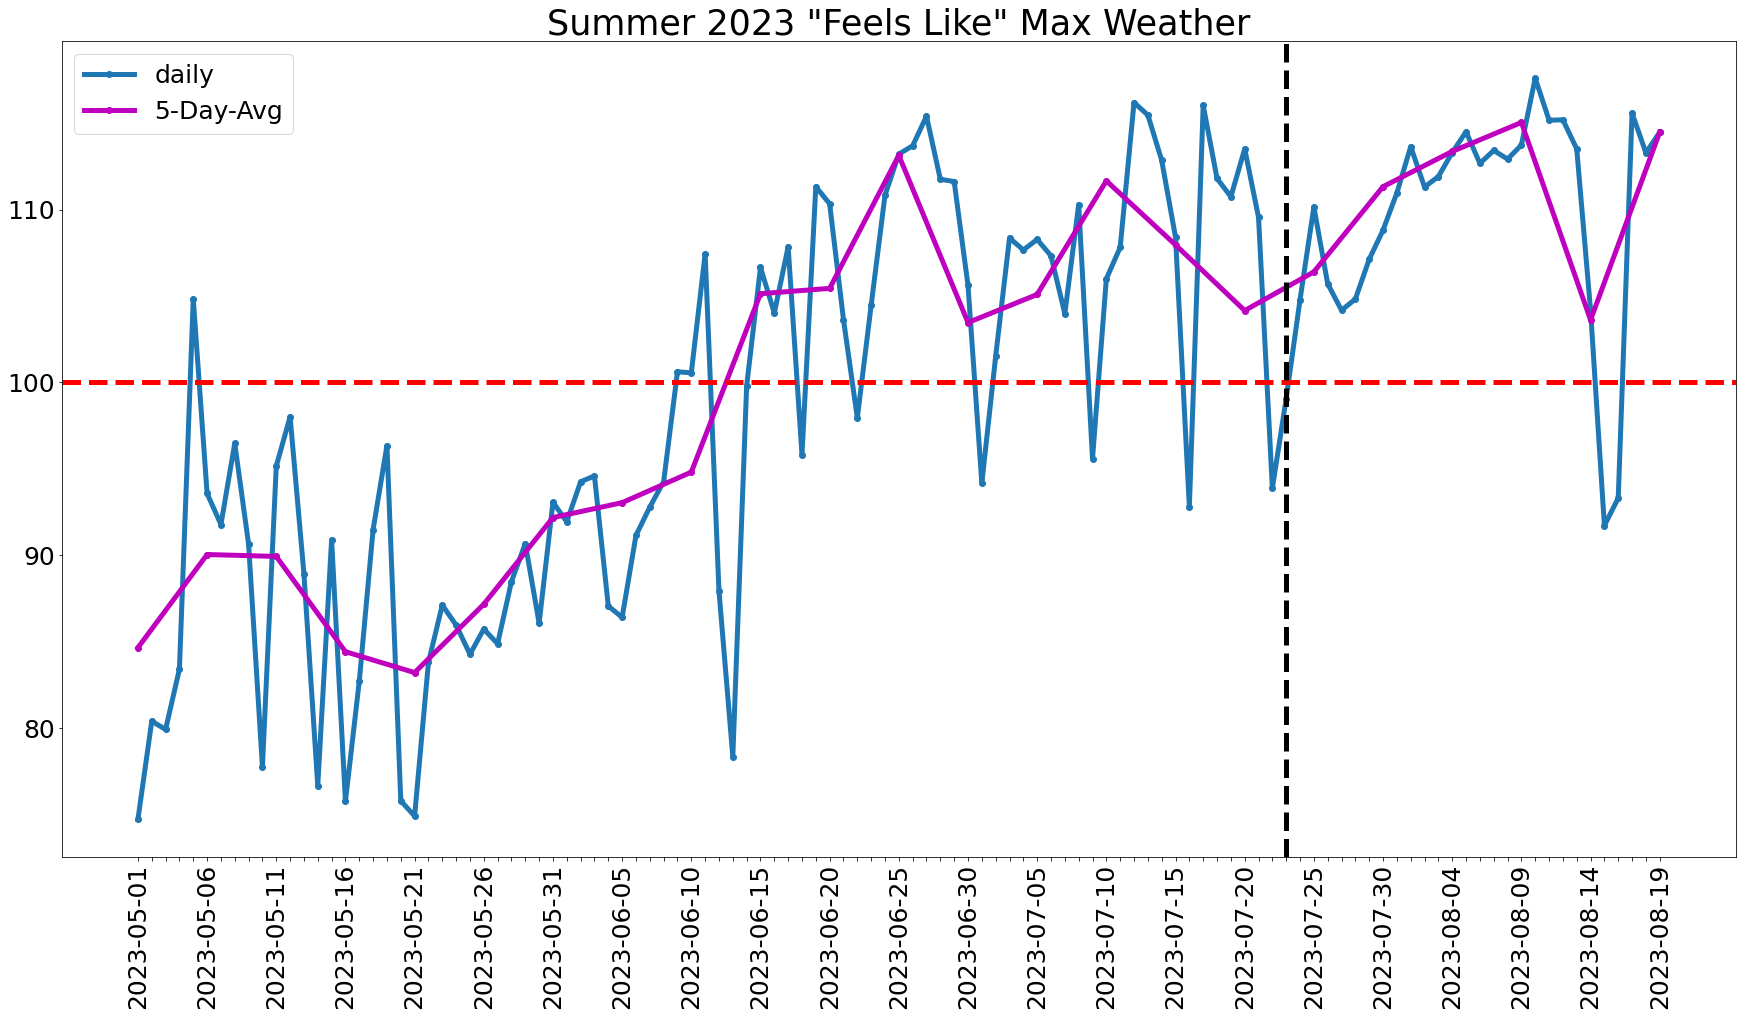

In [119]:
max_weather_feels_like = summer_2023.groupby('date')['feels_like'].max()
five_day_feels_like_average = max_weather_feels_like.groupby(np.arange(len(max_weather_feels_like))//5).mean()
five_day_feels_like_average.index = [max_weather_feels_like.index[i] for i in range(0, max_weather_feels_like.shape[0], 5)]
plt.rcParams["figure.figsize"] = (30, 15)
fig, ax = plt.subplots()
ax.plot_date(max_weather_feels_like.index, max_weather_feels_like, linestyle='solid', linewidth=5, label='daily')
#ax.plot_date(three_day_average.index, three_day_average, linestyle='solid', linewidth=5, color='g')
ax.plot_date(five_day_feels_like_average.index, five_day_feels_like_average, linestyle='solid', linewidth=5, color='m', label='5-Day-Avg')
original_labels = [str(label) for label in ax.get_xticks()]
labels_of_interest = [str(i) for i in np.arange(0,len(original_labels),5)]
new_labels = [str(max_weather.index[int(label)]) if label in labels_of_interest else "" for label in original_labels]
ax.set_xticklabels(new_labels)
plt.xticks(rotation=90)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.title('Summer 2023 "Feels Like" Max Weather', fontsize=35)
plt.axhline(y = 100, color = 'r', linestyle = 'dashed', linewidth=5)
plt.axvline(x = 83, color = 'k', linestyle = 'dashed', linewidth=5)
plt.legend(fontsize=25)
print()
print()
plt.show()
fig.savefig('Summer_2023_Max_Weather_Feels_Like.png')
print()
print()

In [121]:
new_labels

['2023-05-01',
 '',
 '',
 '',
 '',
 '2023-05-06',
 '',
 '',
 '',
 '',
 '2023-05-11',
 '',
 '',
 '',
 '',
 '2023-05-16',
 '',
 '',
 '',
 '',
 '2023-05-21',
 '',
 '',
 '',
 '',
 '2023-05-26',
 '',
 '',
 '',
 '',
 '2023-05-31',
 '',
 '',
 '',
 '',
 '2023-06-05',
 '',
 '',
 '',
 '',
 '2023-06-10',
 '',
 '',
 '',
 '',
 '2023-06-15',
 '',
 '',
 '',
 '',
 '2023-06-20',
 '',
 '',
 '',
 '',
 '2023-06-25',
 '',
 '',
 '',
 '',
 '2023-06-30',
 '',
 '',
 '',
 '',
 '2023-07-05',
 '',
 '',
 '',
 '',
 '2023-07-10',
 '',
 '',
 '',
 '',
 '2023-07-15',
 '',
 '',
 '',
 '',
 '2023-07-20',
 '',
 '',
 '',
 '',
 '2023-07-25',
 '',
 '',
 '',
 '',
 '2023-07-30',
 '',
 '',
 '',
 '',
 '2023-08-04',
 '',
 '',
 '',
 '',
 '2023-08-09',
 '',
 '',
 '',
 '',
 '2023-08-14',
 '',
 '',
 '',
 '',
 '2023-08-19']

This time using moving averages, with sliding window of size 3 and 5 respectively

In [13]:
ma_3_max_weather = max_weather.rolling(3).mean()
ma_5_max_weather = max_weather.rolling(5).mean()

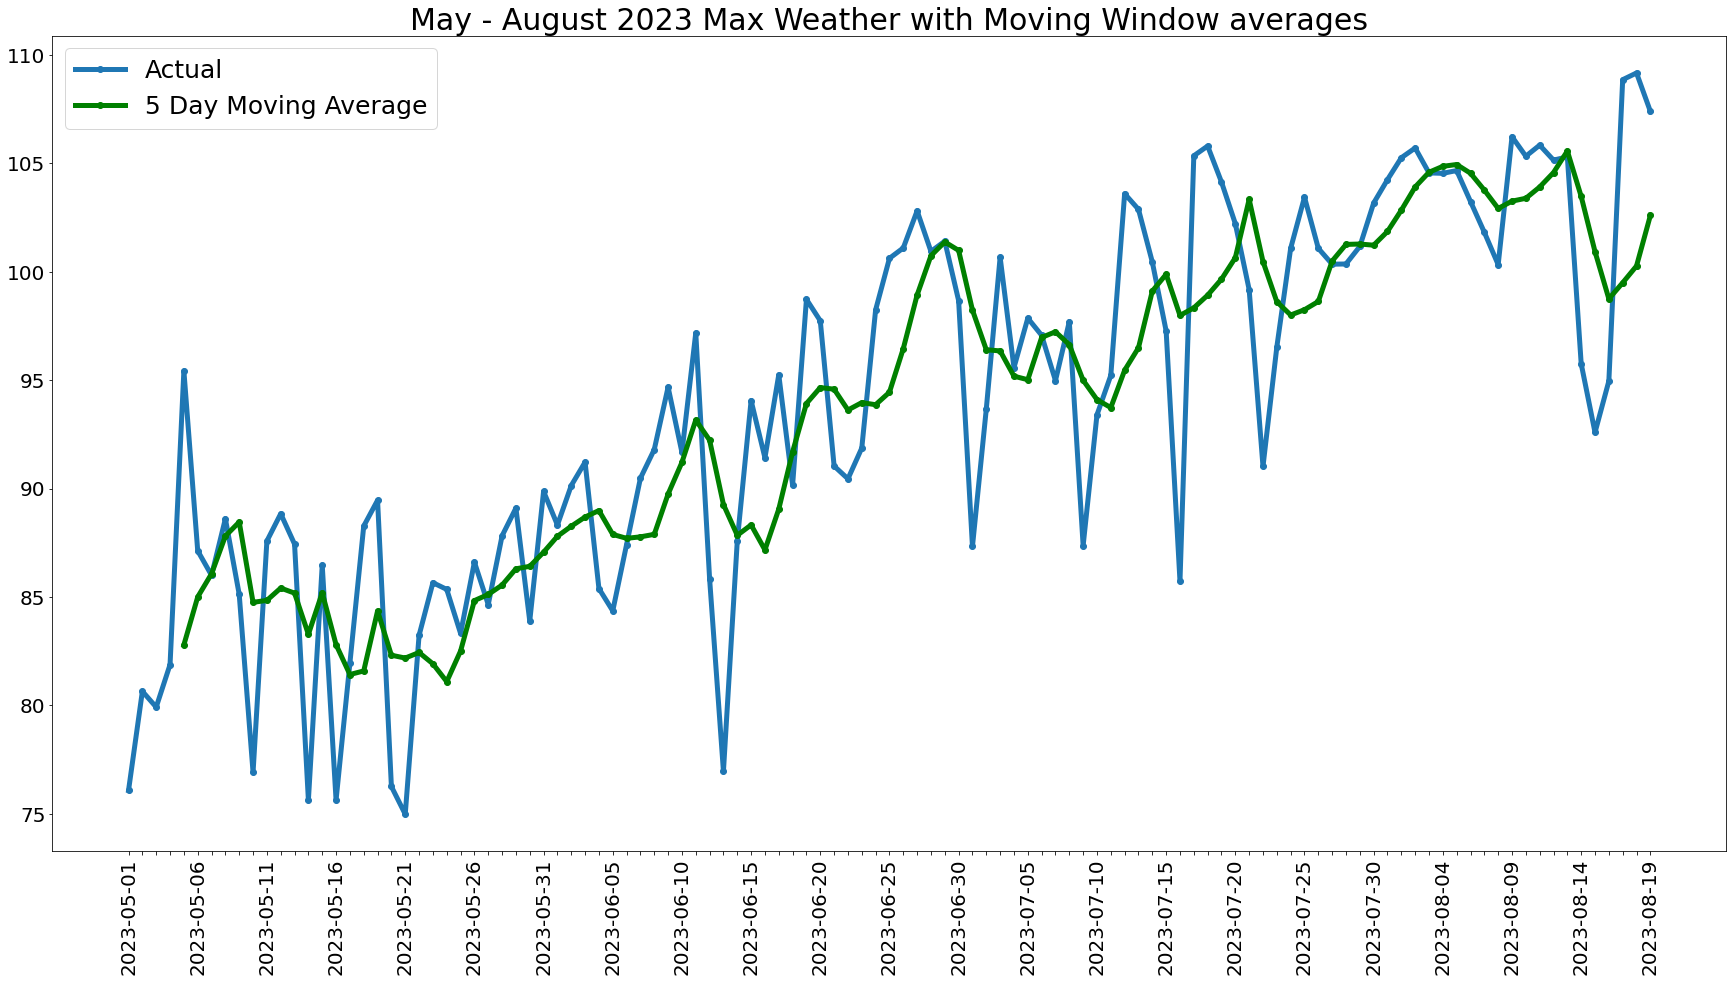

In [14]:
plt.rcParams["figure.figsize"] = (30, 15)
fig, ax = plt.subplots()
ax.plot_date(max_weather.index, max_weather, linestyle='solid', linewidth=5, label='Actual')
#ax.plot_date(ma_3_max_weather.index, ma_3_max_weather, linestyle='solid', linewidth=5, color='g')
ax.plot_date(ma_5_max_weather.index, ma_5_max_weather, linestyle='solid', linewidth=5, color='g', label='5 Day Moving Average')
#ax.plot_date(five_day_average.index, five_day_average, linestyle='solid', linewidth=5, color='m')
original_labels = [str(label) for label in ax.get_xticks()]
labels_of_interest = [str(i) for i in np.arange(0,len(original_labels),5)]
new_labels = [str(max_weather.index[int(label)]) if label in labels_of_interest else "" for label in original_labels]
ax.set_xticklabels(new_labels)
plt.xticks(rotation=90)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title('May - August 2023 Max Weather with Moving Window averages', fontsize=30)
#plt.axhline(y = 100, color = 'r', linestyle = 'dashed', linewidth=5)
#plt.axvline(x = 83, color = 'k', linestyle = 'dashed', linewidth=5)
plt.legend(fontsize=25)
plt.show()
#plt.savefig()

In [15]:
weather['month'] = weather['date'].apply(lambda x: int(x.split('-')[1]))
weather['month'].unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [16]:
summer_2023 = weather[weather['date'] >= '2023-05-01']

In [17]:
months = []

In [18]:
import calendar

In [19]:
def get_month_index(data):
    months = list(calendar.month_name)
    months.remove('')
    index = [months[month - 1] for month in data.index]
    data.index = index
    return data

In [20]:
def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i] + 0.01, y[i], ha = 'center', fontsize=12)

In [21]:
degree_sign = u'\N{DEGREE SIGN}'

### Monthly Max Temperature

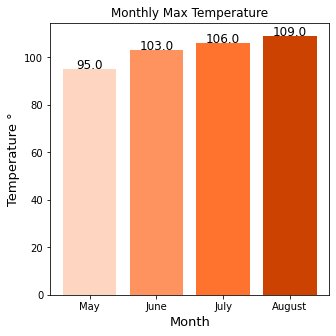

In [22]:
plt.rcParams["figure.figsize"] = (5, 5)
month_max_temp = summer_2023.groupby(['month'])['temp'].max().round()
month_max_temp = get_month_index(month_max_temp)
plt.bar(month_max_temp.index, month_max_temp, color=('#fed5c1', '#ff935f', '#ff732e', '#cc4200'))
plt.title('Monthly Max Temperature')
plt.xlabel('Month', fontsize=13)
plt.ylabel(f'Temperature {degree_sign}', fontsize=13)
x = list(month_max_temp.index)
y = list(month_max_temp.values)
add_labels(x, y)
plt.show()

In [23]:
month_max_temp

May        95.0
June      103.0
July      106.0
August    109.0
Name: temp, dtype: float64

Monthly Max Feels Like Temparature

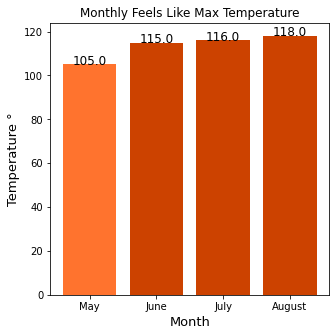

In [24]:
plt.rcParams["figure.figsize"] = (5, 5)
month_feels_like_max_temp = summer_2023.groupby(['month'])['feels_like'].max().round()
month_feels_like_max_temp = get_month_index(month_feels_like_max_temp)
plt.bar(month_feels_like_max_temp.index, month_feels_like_max_temp, color=('#ff732e', '#cc4200', '#cc4200', '#cc4200'))
plt.title('Monthly Feels Like Max Temperature')
plt.xlabel('Month', fontsize=13)
plt.ylabel(f'Temperature {degree_sign}', fontsize=13)
x = list(month_feels_like_max_temp.index)
y = list(month_feels_like_max_temp.values)
add_labels(x, y)
plt.show()

June has the largest difference

### Max Temp Comparison 

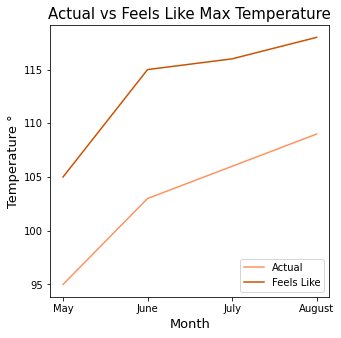

In [25]:
plt.rcParams["figure.figsize"] = (5, 5)
fig, ax = plt.subplots()
ax.plot(month_max_temp.index, month_max_temp, linestyle='solid', color='#ff935f', label='Actual')
ax.plot(month_feels_like_max_temp.index, month_feels_like_max_temp, linestyle='solid', color='#cc5200', label='Feels Like')
plt.title(f'Actual vs Feels Like Max Temperature', fontsize=15)
plt.xlabel('Month', fontsize=13)
plt.ylabel(f'Temperature {degree_sign}', fontsize=13)
#ax.plot_date(three_day_average.index, three_day_average, linestyle='solid', linewidth=5, color='g')

plt.legend(loc = 'lower right')
print()
print()
plt.show()
print()
print()
#plt.savefig()

### Monthly Average Temperature

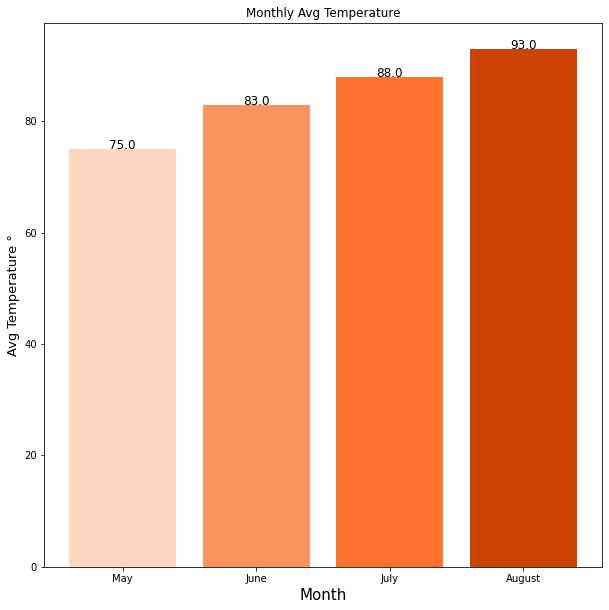

In [26]:
degree_sign = u'\N{DEGREE SIGN}'
plt.rcParams["figure.figsize"] = (10, 10)
month_avg_temp = summer_2023.groupby(['month'])['temp'].mean().round()
month_avg_temp = get_month_index(month_avg_temp)
plt.bar(month_avg_temp.index, month_avg_temp, color=('#fed5c1', '#ff935f', '#ff732e', '#cc4200'))
plt.title('Monthly Avg Temperature')
plt.xlabel('Month', fontsize=15)
plt.ylabel(f'Avg Temperature {degree_sign}', fontsize=13)
x = list(month_avg_temp.index)
y = list(month_avg_temp.values)
add_labels(x, y)
plt.show()

### Monthly Average Temperature

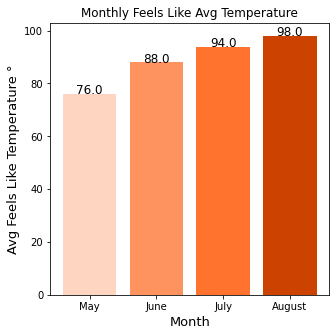

In [27]:
degree_sign = u'\N{DEGREE SIGN}'
plt.rcParams["figure.figsize"] = (5, 5)
month_feels_like_avg_temp = summer_2023.groupby(['month'])['feels_like'].mean().round()
month_feels_like_avg_temp = get_month_index(month_feels_like_avg_temp)
plt.bar(month_feels_like_avg_temp.index, month_feels_like_avg_temp, color=('#fed5c1', '#ff935f', '#ff732e', '#cc4200'))
plt.title('Monthly Feels Like Avg Temperature')
plt.xlabel('Month', fontsize=13)
plt.ylabel(f'Avg Feels Like Temperature {degree_sign}', fontsize=13)
x = list(month_feels_like_avg_temp.index)
y = list(month_feels_like_avg_temp.values)
add_labels(x, y)
plt.show()

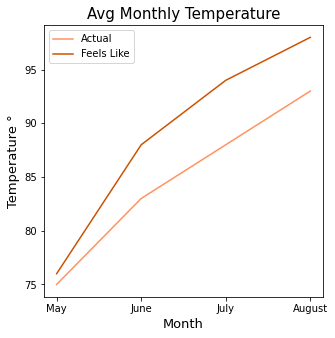

In [28]:
plt.rcParams["figure.figsize"] = (5, 5)
fig, ax = plt.subplots()
ax.plot(month_avg_temp.index, month_avg_temp, linestyle='solid', color='#ff935f', label='Actual')
ax.plot(month_feels_like_avg_temp.index, month_feels_like_avg_temp, linestyle='solid', color='#cc5200', label='Feels Like')
plt.title(f'Avg Monthly Temperature', fontsize=15)
plt.xlabel('Month', fontsize=13)
plt.ylabel(f'Temperature {degree_sign}', fontsize=13)
#ax.plot_date(three_day_average.index, three_day_average, linestyle='solid', linewidth=5, color='g')
plt.legend()
plt.savefig('AVG_Temp_Comparison_Plot.png')
plt.show()

In [29]:
display(month_avg_temp)
display(month_feels_like_avg_temp)

May       75.0
June      83.0
July      88.0
August    93.0
Name: temp, dtype: float64

May       76.0
June      88.0
July      94.0
August    98.0
Name: feels_like, dtype: float64

July has the greatest difference

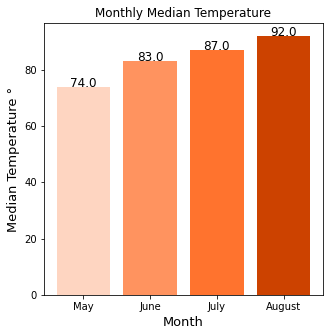

In [30]:
degree_sign = u'\N{DEGREE SIGN}'
plt.rcParams["figure.figsize"] = (5, 5)
month_median_temp = summer_2023.groupby(['month'])['temp'].median().round()
month_median_temp = get_month_index(month_median_temp)
plt.bar(month_median_temp.index, month_median_temp, color=('#fed5c1', '#ff935f', '#ff732e', '#cc4200'))
plt.title('Monthly Median Temperature')
plt.xlabel('Month', fontsize=13)
plt.ylabel(f'Median Temperature {degree_sign}', fontsize=13)
x = list(month_median_temp.index)
y = list(month_median_temp.values)
add_labels(x, y)
plt.show()

Median monthly temperature distribution not too different from average, so this dataset is not very skewedm

Calculate number of consecutive hot days

In [31]:
summer_2023 = weather[weather['date'] >= '2023-05-01']

Checking how many days are above 100

In [32]:
def line_plot_with_ref_line(df, date_col, temp_col, xaxis, yaxis, href, title):
    plt.rcParams["figure.figsize"] = (30, 10)
    plt.plot_date(df.date, df.temp, linestyle='solid', linewidth=5, color='m')
    plt.xlabel(f'{xaxis}', fontsize=30)
    plt.xticks(rotation=90, fontsize=20)
    plt.yticks(fontsize=20)
    plt.axhline(y = href, color = 'r', linestyle = 'dashed', linewidth=5)
    plt.ylabel(f'{yaxis}', fontsize=30)
    plt.title(title)
    plt.show()

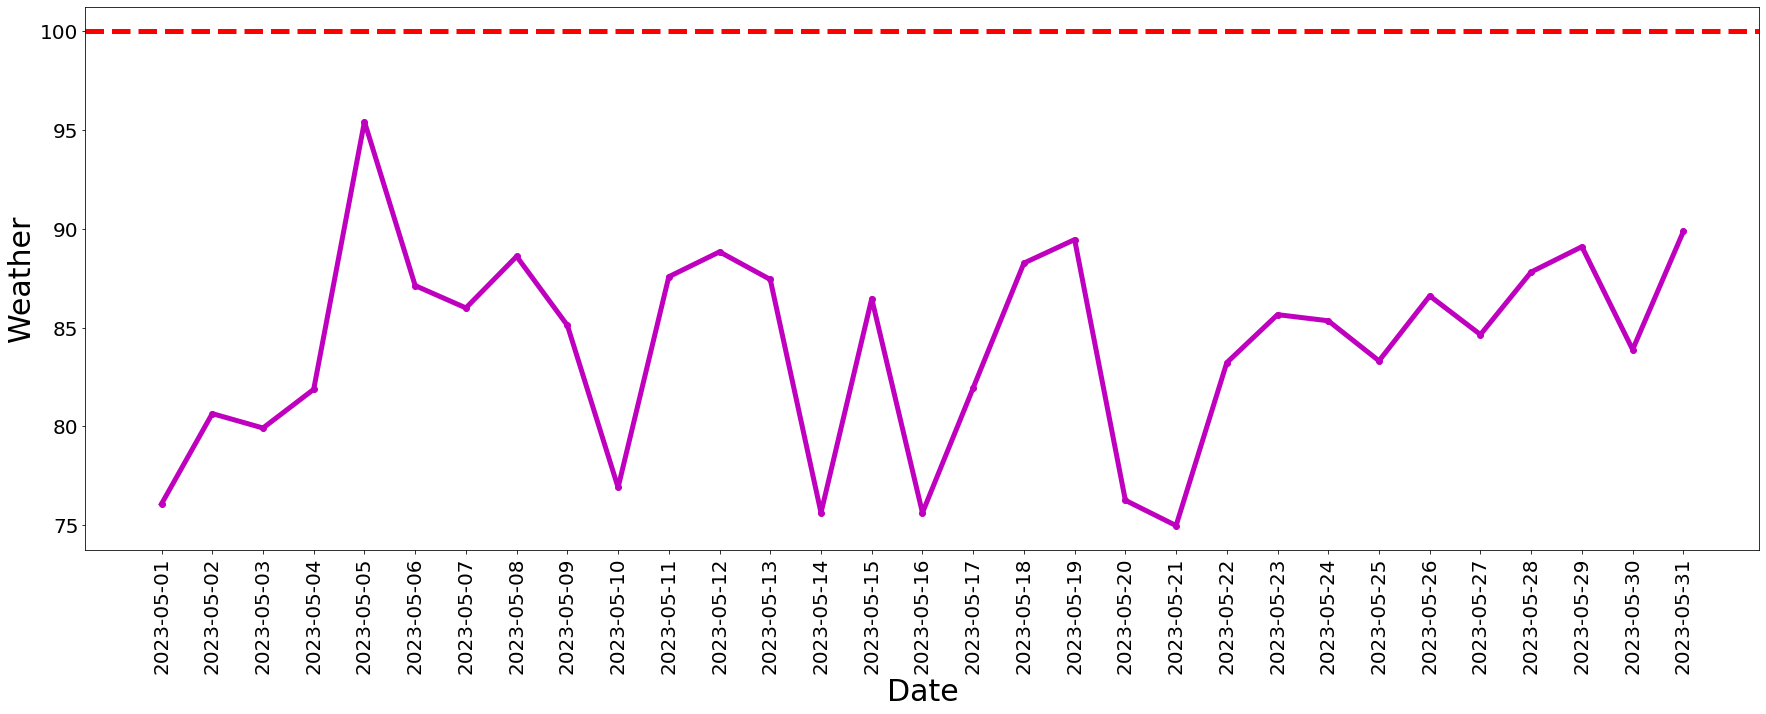

In [33]:
may_2023 = summer_2023[summer_2023['month'] == 5]
may_2023_max_temp = may_2023.groupby('date')['temp'].max()
may_2023_max_temp = may_2023_max_temp.reset_index()
line_plot_with_ref_line(may_2023_max_temp, 'date', 'temp', 'Date', 'Weather', 100)

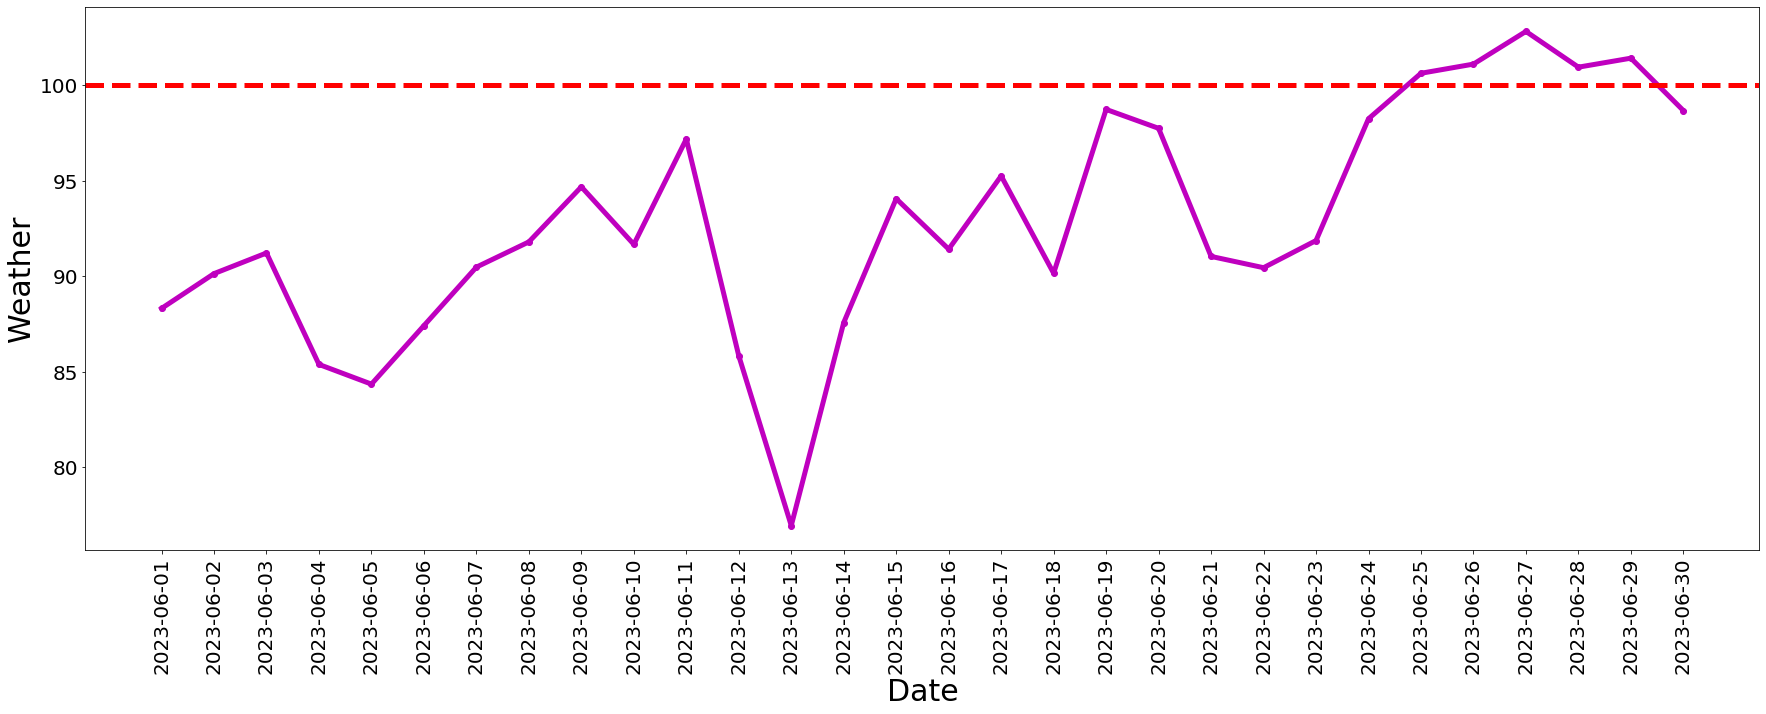

In [34]:
june_2023 = summer_2023[summer_2023['month'] == 6]
june_2023_max_temp = june_2023.groupby('date')['temp'].max()
june_2023_max_temp = june_2023_max_temp.reset_index()
line_plot_with_ref_line(june_2023_max_temp, 'date', 'temp', 'Date', 'Weather', 100)

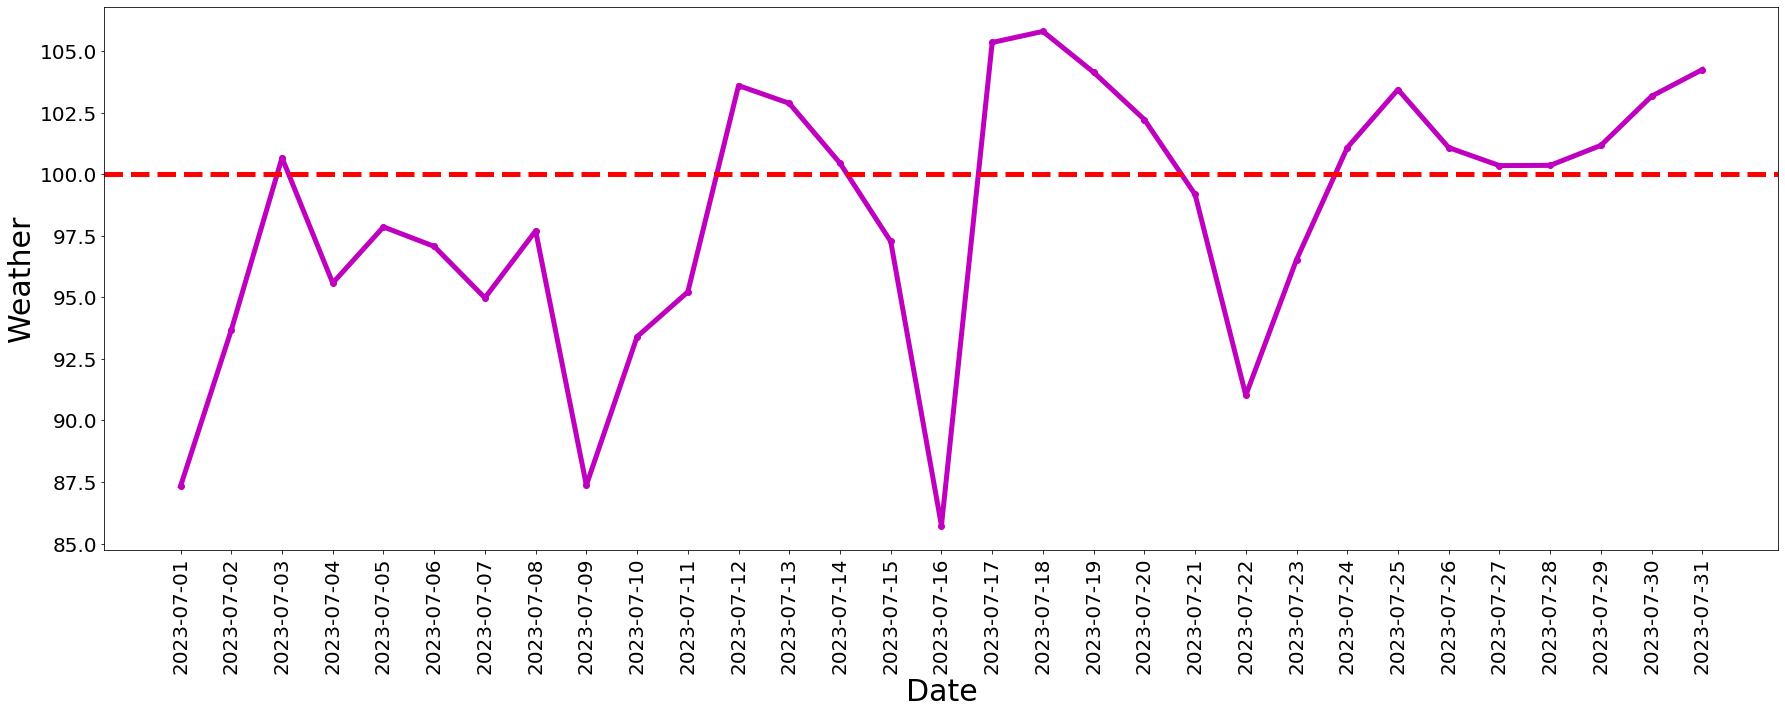

In [35]:
july_2023 = summer_2023[summer_2023['month'] == 7]
july_2023_max_temp = july_2023.groupby('date')['temp'].max()
july_2023_max_temp = july_2023_max_temp.reset_index()
line_plot_with_ref_line(july_2023_max_temp, 'date', 'temp', 'Date', 'Weather', 100)

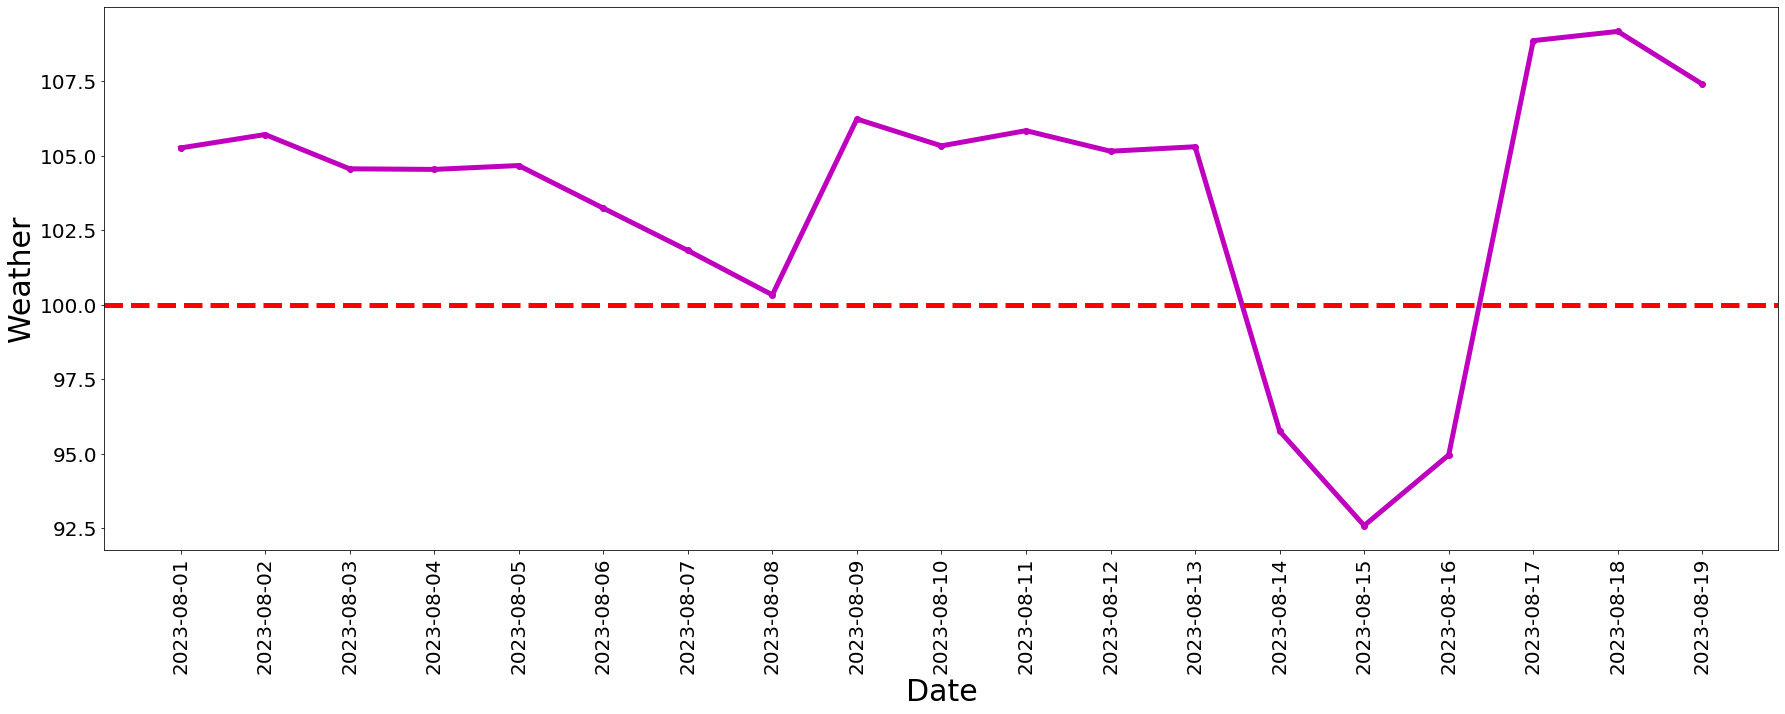

In [36]:
aug_2023 = summer_2023[summer_2023['month'] == 8]
aug_2023_max_temp = aug_2023.groupby('date')['temp'].max()
aug_2023_max_temp = aug_2023_max_temp.reset_index()
line_plot_with_ref_line(aug_2023_max_temp, 'date', 'temp', 'Date', 'Weather', 100)

# BASIC WEATHER ANALYSIS END

#### Calculating number of total hot days (100+) per month

In [37]:
HOT_TEMP = 100
summer_days = weather[weather['date'] >= '2023-05-01']
max_temp_summer = summer_days.groupby('date')['temp'].max()
max_temp_summer = max_temp_summer.reset_index()
max_temp_summer['month'] = max_temp_summer['date'].apply(lambda x: int(x.split('-')[1]))


months = []
days = []
month_total_hot_days = pd.DataFrame({'month': months, 'total_hot_days': days})

max_temp_summer['month'] = max_temp_summer['date'].apply(lambda x: int(x.split('-')[1]))

for month in max_temp_summer['month'].unique():
    summer_month = max_temp_summer[max_temp_summer['month'] == month]
    d = summer_month[summer_month['temp'] >= HOT_TEMP].shape[0]
    months.append(month)
    days.append(d)



In [38]:
month_total_hot_days['month'] = months
month_total_hot_days['total_hot_days'] = days
month_total_hot_days

,month,total_hot_days
0,5,0
1,6,5
2,7,16
3,8,16


#### Calculating number of consecutive hot days (100+) per month

In [39]:
months = []
days = []
month_max_consecutive_hot_days = pd.DataFrame({'month': months, 'max_consecutive_hot_days': days})

max_temp_summer['month'] = max_temp_summer['date'].apply(lambda x: int(x.split('-')[1]))

for month in max_temp_summer['month'].unique():
    summer_month = max_temp_summer[max_temp_summer['month'] == month]
    d = sum(summer_month[::-1]['temp'].expanding().apply(lambda x: np.all(x>100)))
    months.append(month)
    days.append(d)


In [40]:
may_23 = max_temp_summer[max_temp_summer['month'] == 5]
d = sum(summer_month[::-1]['temp'].expanding().apply(lambda x: np.all(x>90)))

In [41]:
month_max_consecutive_hot_days['month'] = months
month_max_consecutive_hot_days['max_consecutive_hot_days'] = days
month_max_consecutive_hot_days

,month,max_consecutive_hot_days
0,5,0.0
1,6,0.0
2,7,8.0
3,8,3.0


In [42]:
max_temp_summer.reset_index()

,index,date,temp,month
0,0,2023-05-01,76.08,5
1,1,2023-05-02,80.65,5
2,2,2023-05-03,79.92,5
3,3,2023-05-04,81.88,5
4,4,2023-05-05,95.43,5
...,...,...,...,...
106,106,2023-08-15,92.59,8
107,107,2023-08-16,94.96,8
108,108,2023-08-17,108.86,8
109,109,2023-08-18,109.17,8


Get number of hours in a day the weather is 90+, could also get heat duration, when weather is first above 90, and when it is last above 90, but it could also dip, specifically in May

In [43]:
summer_2023['hot'] = summer_2023['temp'].apply(lambda x: x >= 100)

Filter this down by only looking at day time hours (6 AM - 8 PM) 

In [44]:
summer_2023['time'].unique()

array(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
       '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00',
       '10:00:00', '11:00:00', '12:00:00', '13:00:00', '14:00:00',
       '15:00:00', '16:00:00', '17:00:00', '18:00:00', '19:00:00',
       '20:00:00', '21:00:00', '22:00:00', '23:00:00'], dtype=object)

In [45]:
summer_2023['hot'].value_counts()

False    2469
True      189
Name: hot, dtype: int64

In [46]:
summer_2023.groupby('month')['hot'].mean()

month
5    0.000000
6    0.023611
7    0.092867
8    0.228381
Name: hot, dtype: float64

In [47]:
summer_2023['time'].apply(lambda x: int(x.split(':')[0])).head(30)

134381     0
134382     1
134383     2
134384     3
134385     4
134386     5
134387     6
134388     7
134389     8
134390     9
134391    10
134392    11
134393    12
134394    13
134395    14
134396    15
134397    16
134398    17
134399    18
134400    19
134401    20
134402    21
134403    22
134404    23
134405     0
134406     1
134407     2
134408     3
134409     4
134410     5
Name: time, dtype: int64

In [48]:
summer_2023['time_int'] = summer_2023['time'].apply(lambda x: int(x.split(':')[0]))
summer_2023['time_int'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [49]:
summer_daytime = summer_2023[(summer_2023['time_int'] >= 6) & (summer_2023['time_int'] <= 20)]

In [50]:
hot_day_duration = summer_daytime.groupby('date')['hot'].count()
hot_day_duration = hot_day_duration.reset_index()
hot_day_duration = hot_day_duration.rename(columns={'hot': 'hot_hours_duration'})
hot_day_duration

,date,hot_hours_duration
0,2023-05-01,15
1,2023-05-02,15
2,2023-05-03,15
3,2023-05-04,15
4,2023-05-05,15
...,...,...
106,2023-08-15,15
107,2023-08-16,15
108,2023-08-17,15
109,2023-08-18,15


In [51]:
summer_daytime['date']

134387    2023-05-01
134388    2023-05-01
134389    2023-05-01
134390    2023-05-01
134391    2023-05-01
             ...    
137035    2023-08-19
137036    2023-08-19
137037    2023-08-19
137038    2023-08-19
137039    2023-08-19
Name: date, Length: 1662, dtype: object

In [52]:
hot_day_duration['date']

0      2023-05-01
1      2023-05-02
2      2023-05-03
3      2023-05-04
4      2023-05-05
          ...    
106    2023-08-15
107    2023-08-16
108    2023-08-17
109    2023-08-18
110    2023-08-19
Name: date, Length: 111, dtype: object

In [53]:
result = summer_daytime.merge(hot_day_duration, on='date', suffixes=(None, None))

not much of a difference when looking at summer heat duration 

In [54]:
result.groupby('month')['hot_hours_duration'].mean()

month
5    15.000000
6    15.000000
7    14.969828
8    14.908127
Name: hot_hours_duration, dtype: float64

In [55]:
result.groupby('month')['hot_hours_duration'].mean()

month
5    15.000000
6    15.000000
7    14.969828
8    14.908127
Name: hot_hours_duration, dtype: float64

how many hours is that on average?

How about summer evenings?

In [56]:
result.columns

Index(['dt', 'dt_iso', 'timezone', 'city_name', 'lat', 'lon', 'temp',
       'visibility', 'dew_point', 'feels_like', 'temp_min', 'temp_max',
       'pressure', 'sea_level', 'grnd_level', 'humidity', 'wind_speed',
       'wind_deg', 'wind_gust', 'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h',
       'clouds_all', 'weather_id', 'weather_main', 'weather_description',
       'weather_icon', 'cst_timestamp', 'date', 'time', 'month', 'hot',
       'time_int', 'hot_hours_duration'],
      dtype='object')

In [57]:
summer_2023_evenings =  result[result['time_int'] > 18]
summer_2023_evenings.groupby('month')['hot_hours_duration'].mean()

month
5    15.000000
6    15.000000
7    14.967742
8    15.000000
Name: hot_hours_duration, dtype: float64

In [58]:
summer_2023_evenings =  result[result['time_int'] > 19]
summer_2023_evenings.groupby('month')['hot_hours_duration'].mean()

month
5    15.000000
6    15.000000
7    14.967742
8    15.000000
Name: hot_hours_duration, dtype: float64

In [59]:
summer_2023_evenings =  result[result['time_int'] > 20]
summer_2023_evenings.groupby('month')['hot_hours_duration'].mean()

Series([], Name: hot_hours_duration, dtype: float64)

In [60]:
result[result['time_int'] > 20]

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,weather_main,weather_description,weather_icon,cst_timestamp,date,time,month,hot,time_int,hot_hours_duration


In [61]:
result['time_int'].unique()

array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
      dtype=int64)

#### What is the heat like during the summer morning (6 - 10 AM) CST? 

In [62]:
summer_mornings = result[(result['time_int'] >= 6) & (result['time_int'] <= 15)]

In [63]:
summer_mornings.groupby(['month', 'time_int'])['temp'].mean()

month  time_int
5      6            66.992581
       7            66.927742
       8            68.749677
       9            71.766452
       10           74.845484
       11           77.248065
       12           79.421613
       13           81.506774
       14           82.521290
       15           83.031290
6      6            74.308000
       7            74.399000
       8            76.368000
       9            79.460667
       10           82.279333
       11           84.775667
       12           87.083000
       13           89.014333
       14           90.733000
       15           91.690333
7      6            80.184667
       7            79.564516
       8            80.710645
       9            83.773548
       10           86.043226
       11           89.032258
       12           91.389677
       13           93.550645
       14           95.018387
       15           96.500645
8      6            83.304737
       7            82.216316
       8            83.0

In [64]:
summer_mornings.groupby(['month', 'time_int'])['temp'].median()

month  time_int
5      6            67.660
       7            67.860
       8            69.620
       9            72.950
       10           75.780
       11           76.410
       12           80.200
       13           82.760
       14           84.290
       15           84.490
6      6            73.300
       7            73.895
       8            76.110
       9            80.200
       10           83.655
       11           85.450
       12           87.680
       13           89.465
       14           90.615
       15           90.850
7      6            80.595
       7            80.560
       8            81.930
       9            84.720
       10           87.530
       11           89.980
       12           93.160
       13           96.170
       14           97.450
       15           98.800
8      6            84.940
       7            83.730
       8            84.780
       9            87.060
       10           89.530
       11           92.140
       12   

Looking at the 'Feels Like' temperature

In [65]:
summer_mornings.groupby(['month', 'time_int'])['feels_like'].mean()

month  time_int
5      6            67.184194
       7            67.137097
       8            69.039677
       9            72.078387
       10           75.442258
       11           78.191935
       12           80.944839
       13           83.454839
       14           84.863871
       15           85.408710
6      6            76.649333
       7            76.476333
       8            78.788333
       9            83.398667
       10           87.727333
       11           91.221333
       12           94.201333
       13           96.335333
       14           98.482333
       15           99.600333
7      6            83.239000
       7            82.513548
       8            84.454516
       9            88.984516
       10           91.999032
       11           95.937419
       12           98.525161
       13          101.182903
       14          102.617097
       15          104.257742
8      6            87.164737
       7            86.051579
       8            87.4

In [66]:
weather[['temp', 'time', 'date']]

,temp,time,date
0,49.15,18:00:00,2007-12-31
1,47.64,19:00:00,2007-12-31
2,45.88,20:00:00,2007-12-31
3,42.98,21:00:00,2007-12-31
4,41.72,22:00:00,2007-12-31
...,...,...,...
137035,104.43,14:00:00,2023-08-19
137036,106.29,15:00:00,2023-08-19
137037,106.86,16:00:00,2023-08-19
137038,107.40,17:00:00,2023-08-19


In [67]:
summer_2023 = weather[weather['date'] >= '2023-05-01']
summer_2023[['date', 'time', 'temp']]

,date,time,temp
134381,2023-05-01,00:00:00,63.88
134382,2023-05-01,01:00:00,62.08
134383,2023-05-01,02:00:00,61.72
134384,2023-05-01,03:00:00,59.45
134385,2023-05-01,04:00:00,57.67
...,...,...,...
137035,2023-08-19,14:00:00,104.43
137036,2023-08-19,15:00:00,106.29
137037,2023-08-19,16:00:00,106.86
137038,2023-08-19,17:00:00,107.40


#### Calculating Temperature Difference for Temp Gradient

In [68]:
summer_2023['temp_lag_1'] = summer_2023['temp'].shift()

In [69]:
summer_2023['temp_lag_1'] = summer_2023['temp_lag_1'].backfill()

In [70]:
summer_2023['abs_temp_diff'] = abs(summer_2023['temp'] - summer_2023['temp_lag_1'])
summer_2023.groupby('month')['abs_temp_diff'].mean()

month
5    1.554812
6    1.689292
7    1.685155
8    1.846652
Name: abs_temp_diff, dtype: float64

### When does the weather start to heat up?

In [71]:
summer_2023['dt_iso']

134381    2023-05-01 05:00:00 +0000 UTC
134382    2023-05-01 06:00:00 +0000 UTC
134383    2023-05-01 07:00:00 +0000 UTC
134384    2023-05-01 08:00:00 +0000 UTC
134385    2023-05-01 09:00:00 +0000 UTC
                      ...              
137035    2023-08-19 19:00:00 +0000 UTC
137036    2023-08-19 20:00:00 +0000 UTC
137037    2023-08-19 21:00:00 +0000 UTC
137038    2023-08-19 22:00:00 +0000 UTC
137039    2023-08-19 23:00:00 +0000 UTC
Name: dt_iso, Length: 2658, dtype: object

In [72]:
summer_2023.columns

Index(['dt', 'dt_iso', 'timezone', 'city_name', 'lat', 'lon', 'temp',
       'visibility', 'dew_point', 'feels_like', 'temp_min', 'temp_max',
       'pressure', 'sea_level', 'grnd_level', 'humidity', 'wind_speed',
       'wind_deg', 'wind_gust', 'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h',
       'clouds_all', 'weather_id', 'weather_main', 'weather_description',
       'weather_icon', 'cst_timestamp', 'date', 'time', 'month', 'temp_lag_1',
       'abs_temp_diff'],
      dtype='object')

In [73]:
summer_2023['temp_diff'] = summer_2023['temp'] - summer_2023['temp_lag_1']
summer_2023[['date', 'time', 'temp_diff']].head(11)

,date,time,temp_diff
134381,2023-05-01,00:00:00,0.00
134382,2023-05-01,01:00:00,-1.80
134383,2023-05-01,02:00:00,-0.36
134384,2023-05-01,03:00:00,-2.27
134385,2023-05-01,04:00:00,-1.78
134386,2023-05-01,05:00:00,-1.89
134387,2023-05-01,06:00:00,-1.14
134388,2023-05-01,07:00:00,-1.13
134389,2023-05-01,08:00:00,3.49
134390,2023-05-01,09:00:00,5.65


### Seeing what the weather trend looks like on the 1st, 15th, and last day of every month

In [74]:
def plot_date_weather_distribution(df, date_col, date_str, time_col, var, title):
    date = summer_2023[summer_2023[date_col] == date_str]
    plt.rcParams["figure.figsize"] = (30, 10)
    fig, ax = plt.subplots()
    #five_day_feels_like_average.index = [max_weather_feels_like.index[i] for i in range(0, max_weather_feels_like.shape[0], 5)]
    #five_day_average = max_weather.groupby(np.arange(len(max_weather))//5).mean()

    ax.plot_date(date[time_col], date[var], linestyle='solid', linewidth=5)

    ax.set_xlabel(f'{time_col.capitalize()}', fontsize = 30)
    ax.set_ylabel(f'{var.capitalize()}', fontsize = 30)
    plt.xticks(fontsize=20, rotation=90)
    plt.yticks(fontsize=20, rotation=90)
    plt.title(title, fontsize=35)
    plt.show()

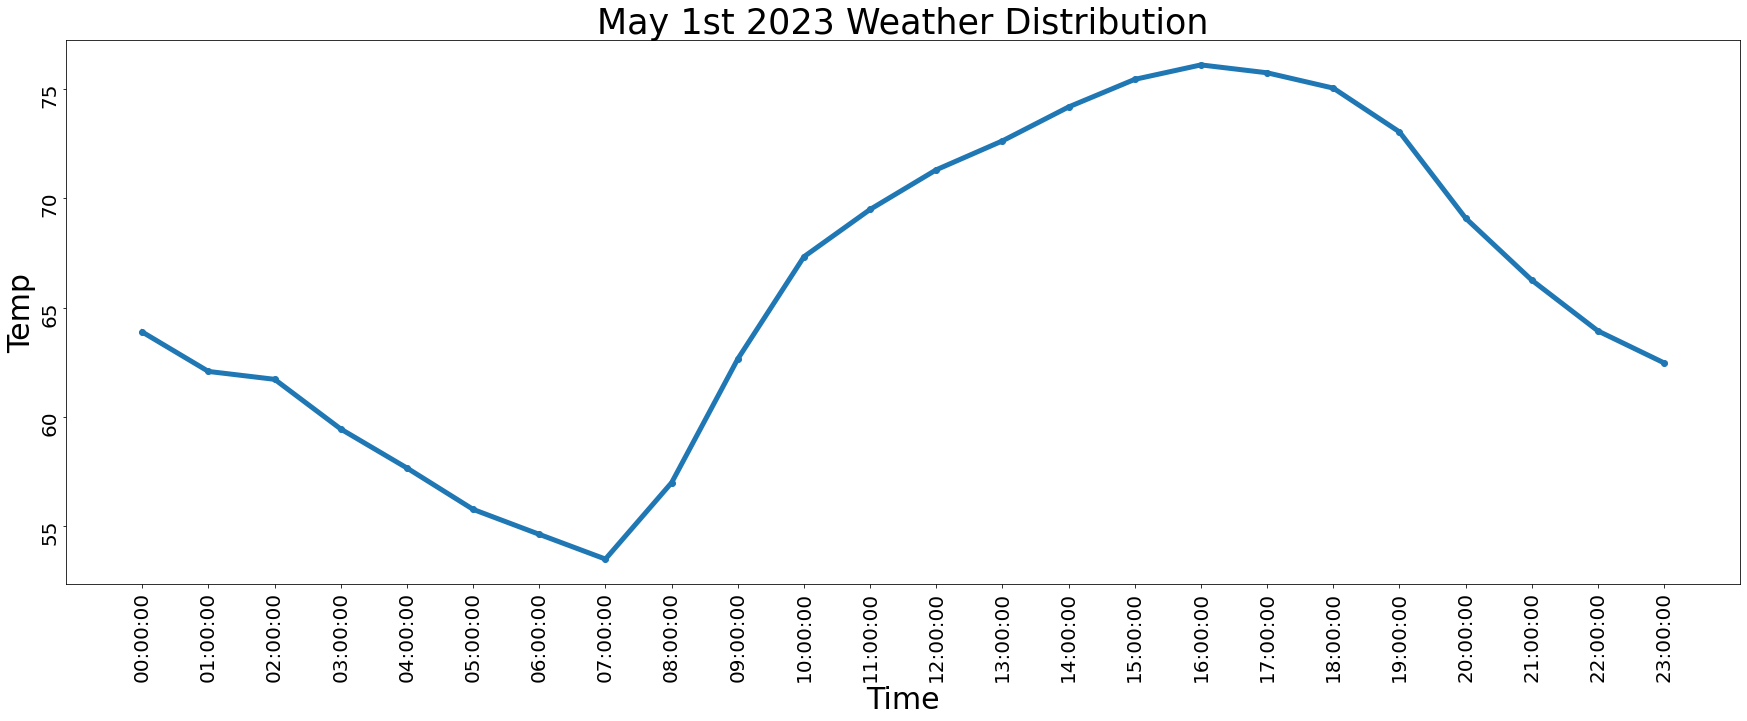

In [75]:
plot_date_weather_distribution(summer_2023, 'date', '2023-05-01', 'time', 'temp', 'May 1st 2023 Weather Distribution')

May 15th has some instability from 6-7 AM, not a huge deal, ok with 2 hour sliding window

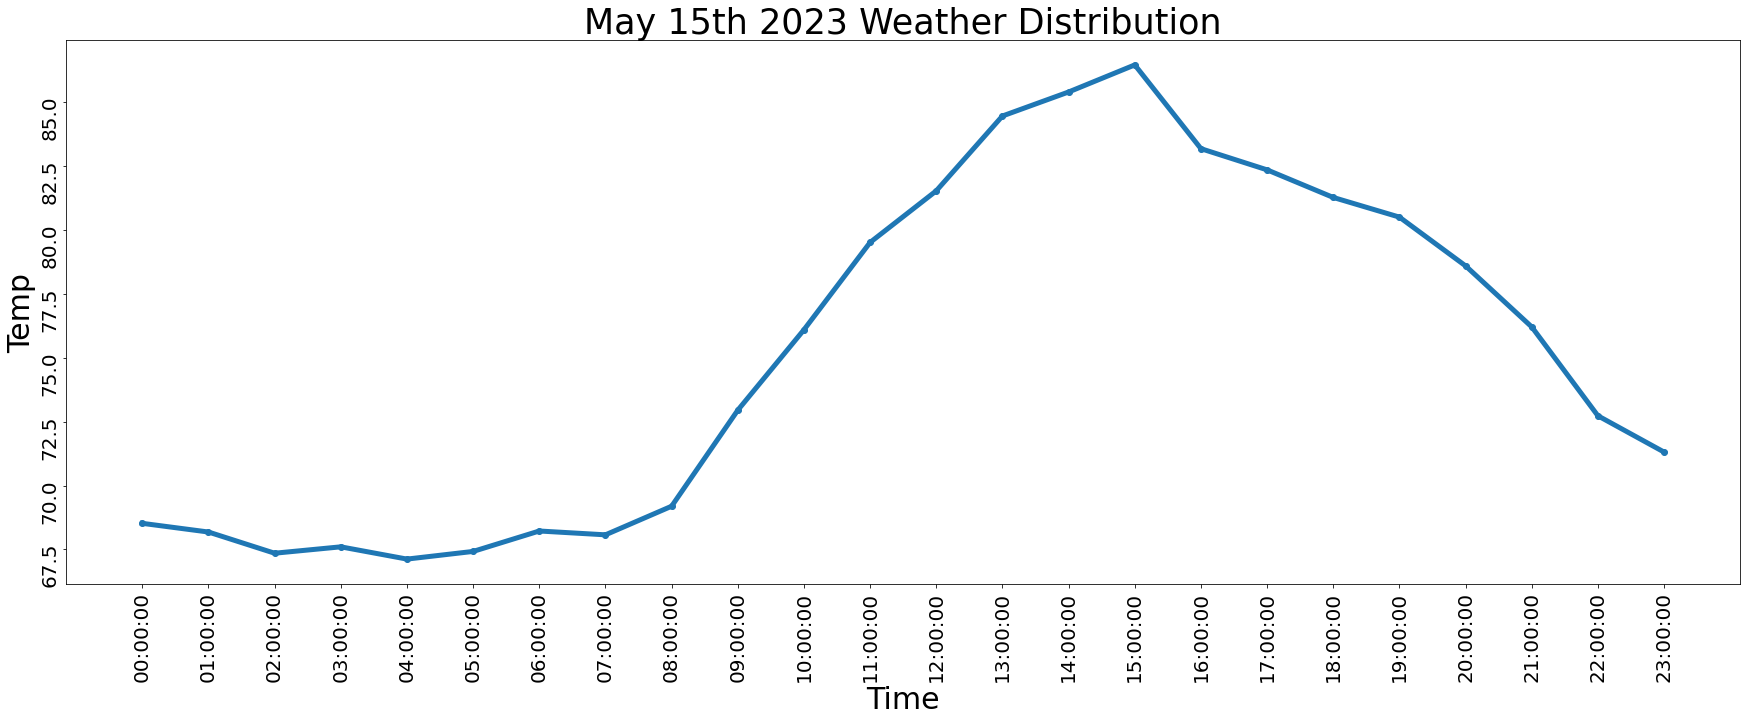

In [76]:
plot_date_weather_distribution(summer_2023, 'date', '2023-05-15', 'time', 'temp', 'May 15th 2023 Weather Distribution')

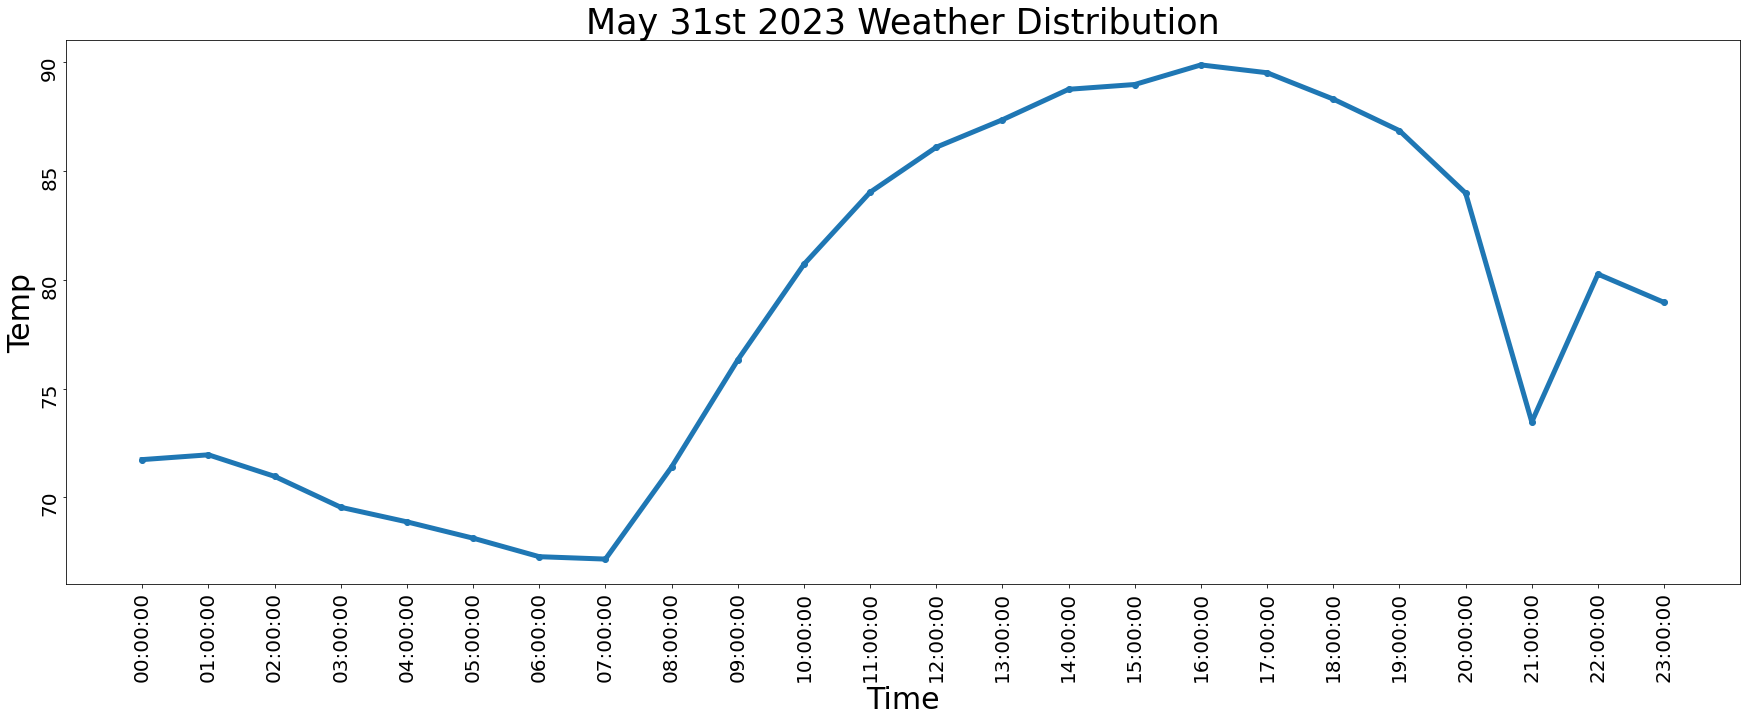

In [77]:
plot_date_weather_distribution(summer_2023, 'date', '2023-05-31', 'time', 'temp', 'May 31st 2023 Weather Distribution')

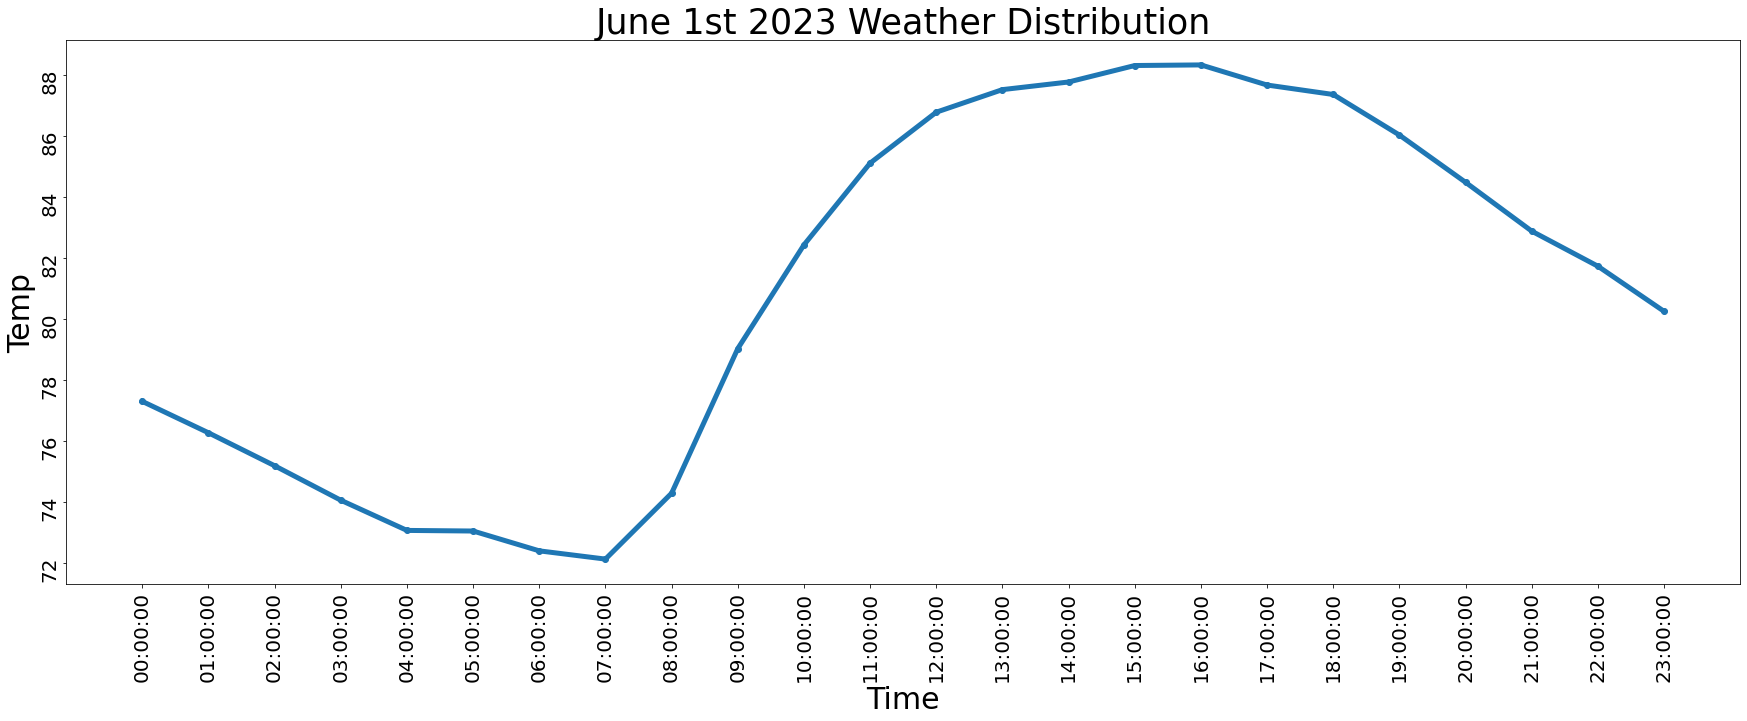

In [78]:
plot_date_weather_distribution(summer_2023, 'date', '2023-06-01', 'time', 'temp', 'June 1st 2023 Weather Distribution')

In [79]:
june_1 = summer_2023[summer_2023['date'] == '2023-06-01']
june_1[(june_1['time'] == '06:00:00') | (june_1['time'] == '07:00:00')]['temp']

135131    72.39
135132    72.12
Name: temp, dtype: float64

Going to be doing 2 hour window to avoid weird dips like this, this could be a problem with data quality

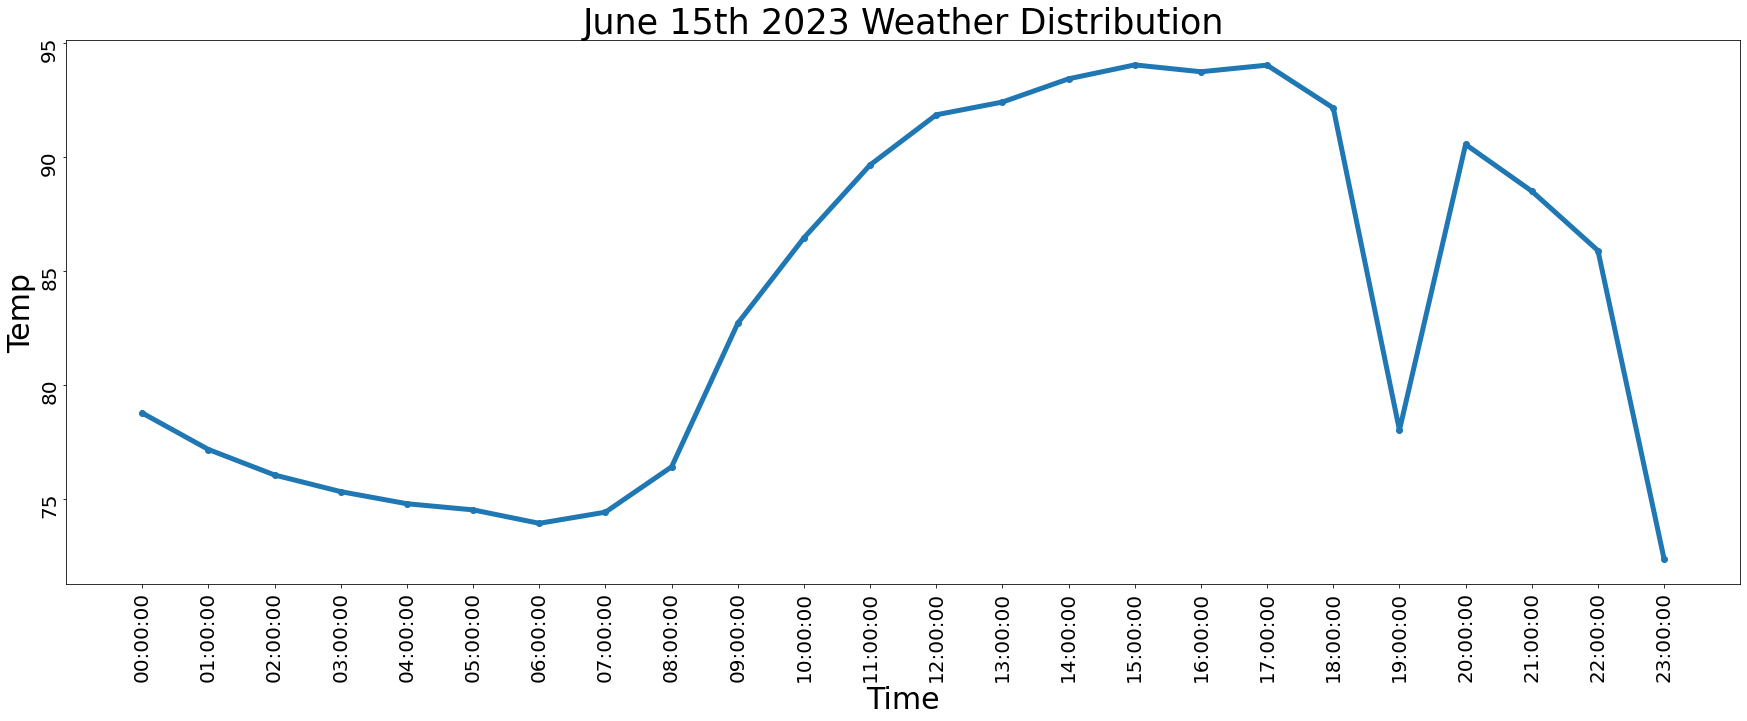

In [80]:
plot_date_weather_distribution(summer_2023, 'date', '2023-06-15', 'time', 'temp', 'June 15th 2023 Weather Distribution')

In [81]:
june_15 = summer_2023[summer_2023['date'] == '2023-06-15']
june_15[(june_15['time'] == '18:00:00') | (june_15['time'] == '19:00:00')]['temp']

135479    92.17
135480    78.03
Name: temp, dtype: float64

June 30th 2023

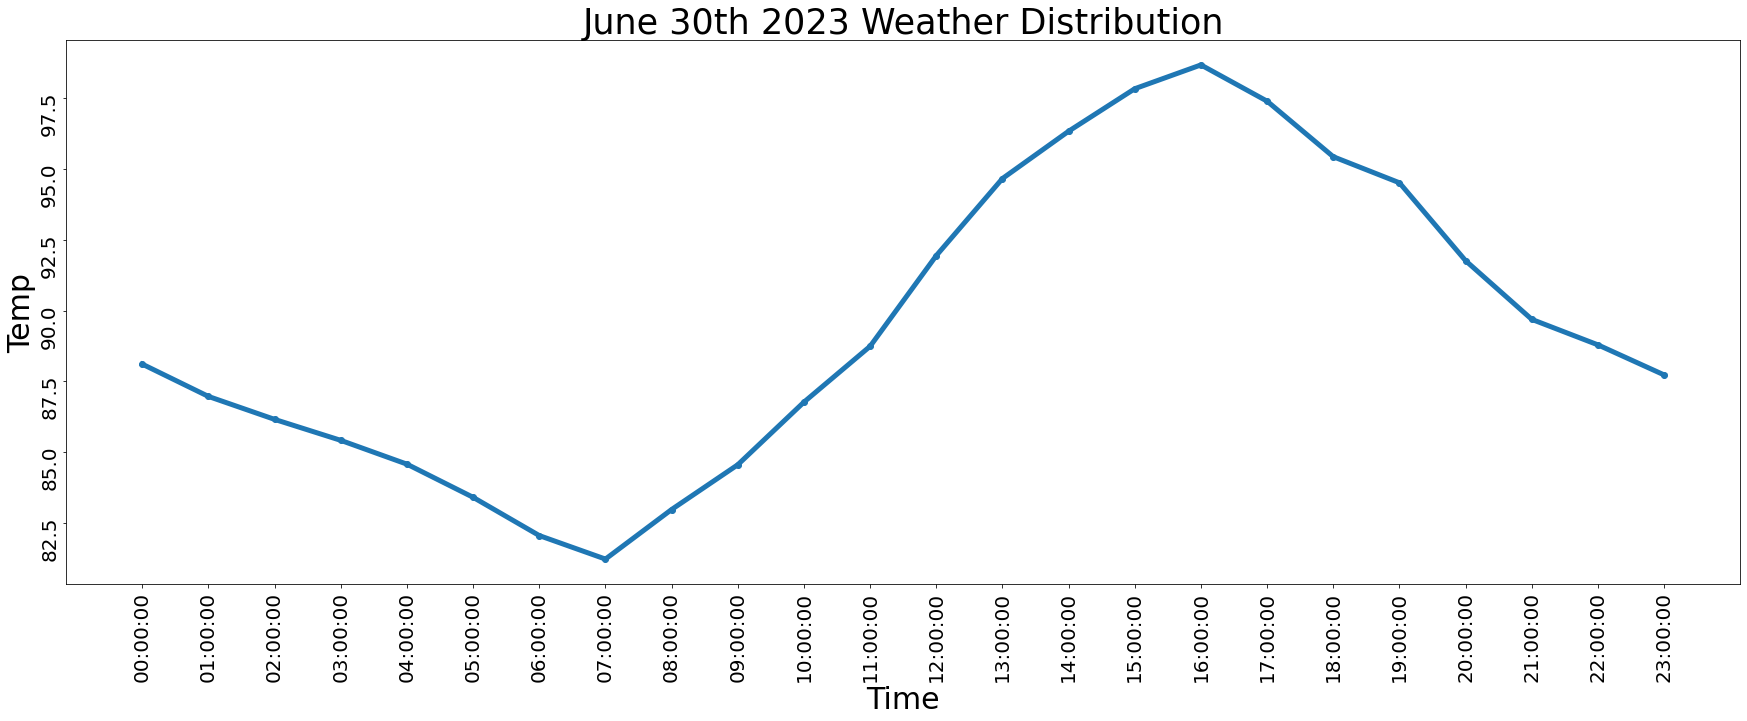

In [82]:
plot_date_weather_distribution(summer_2023, 'date', '2023-06-30', 'time', 'temp', 'June 30th 2023 Weather Distribution')

Instability warrants 2 hour window

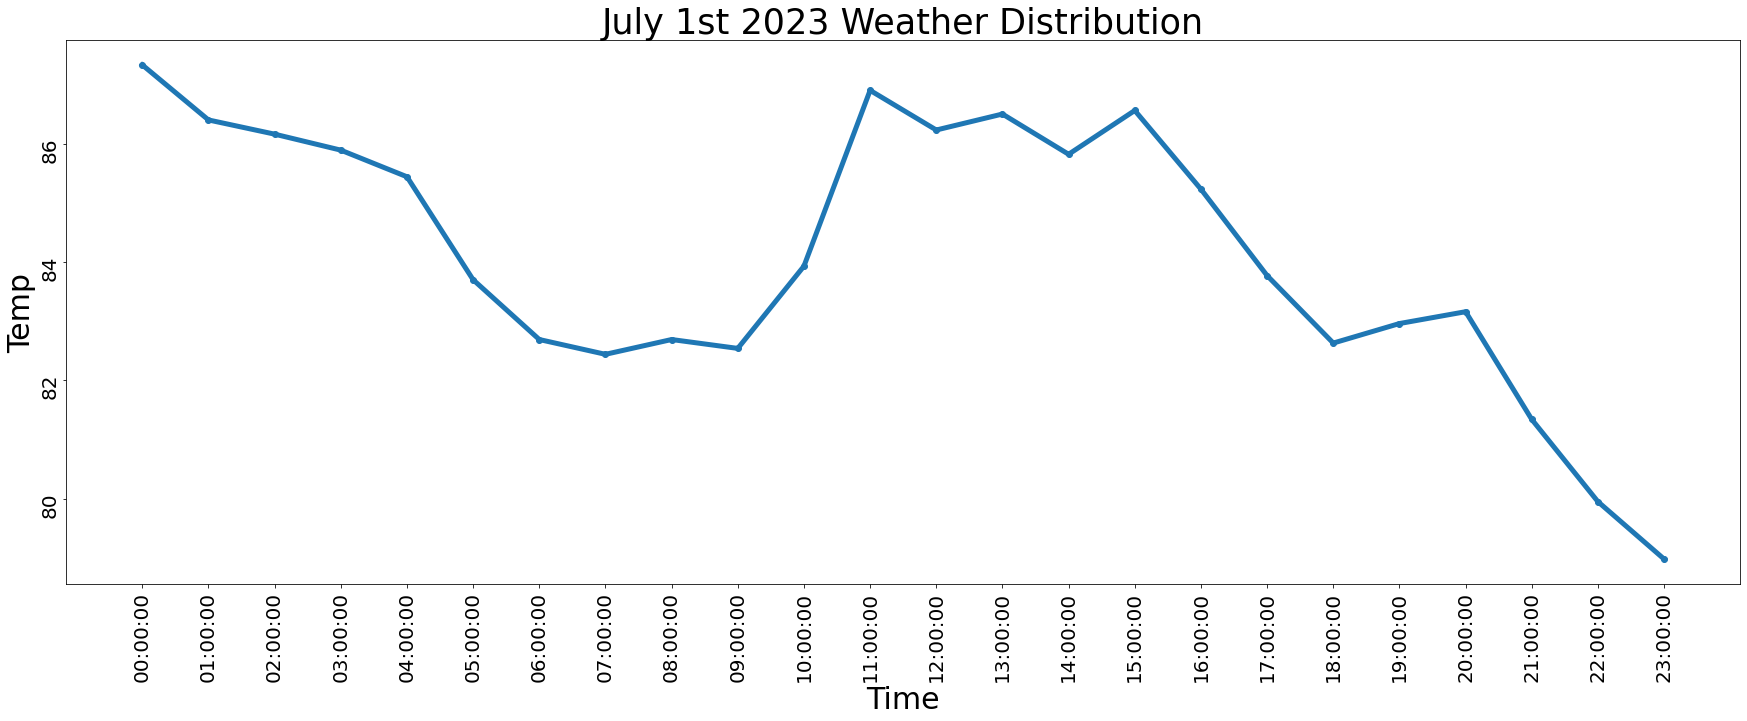

In [83]:
plot_date_weather_distribution(summer_2023, 'date', '2023-07-01', 'time', 'temp', 'July 1st 2023 Weather Distribution')

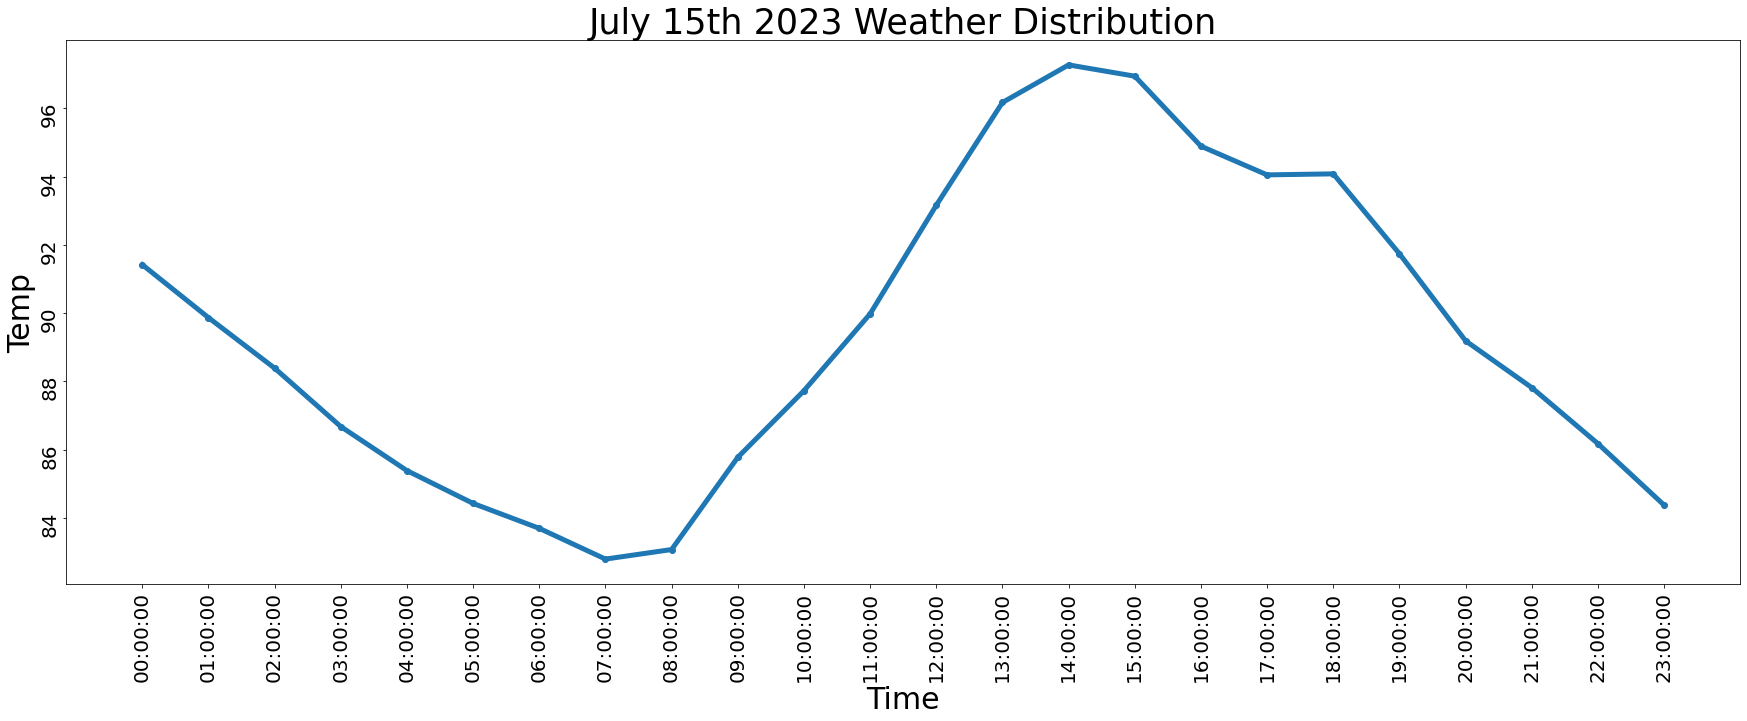

In [84]:
plot_date_weather_distribution(summer_2023, 'date', '2023-07-15', 'time', 'temp', 'July 15th 2023 Weather Distribution')

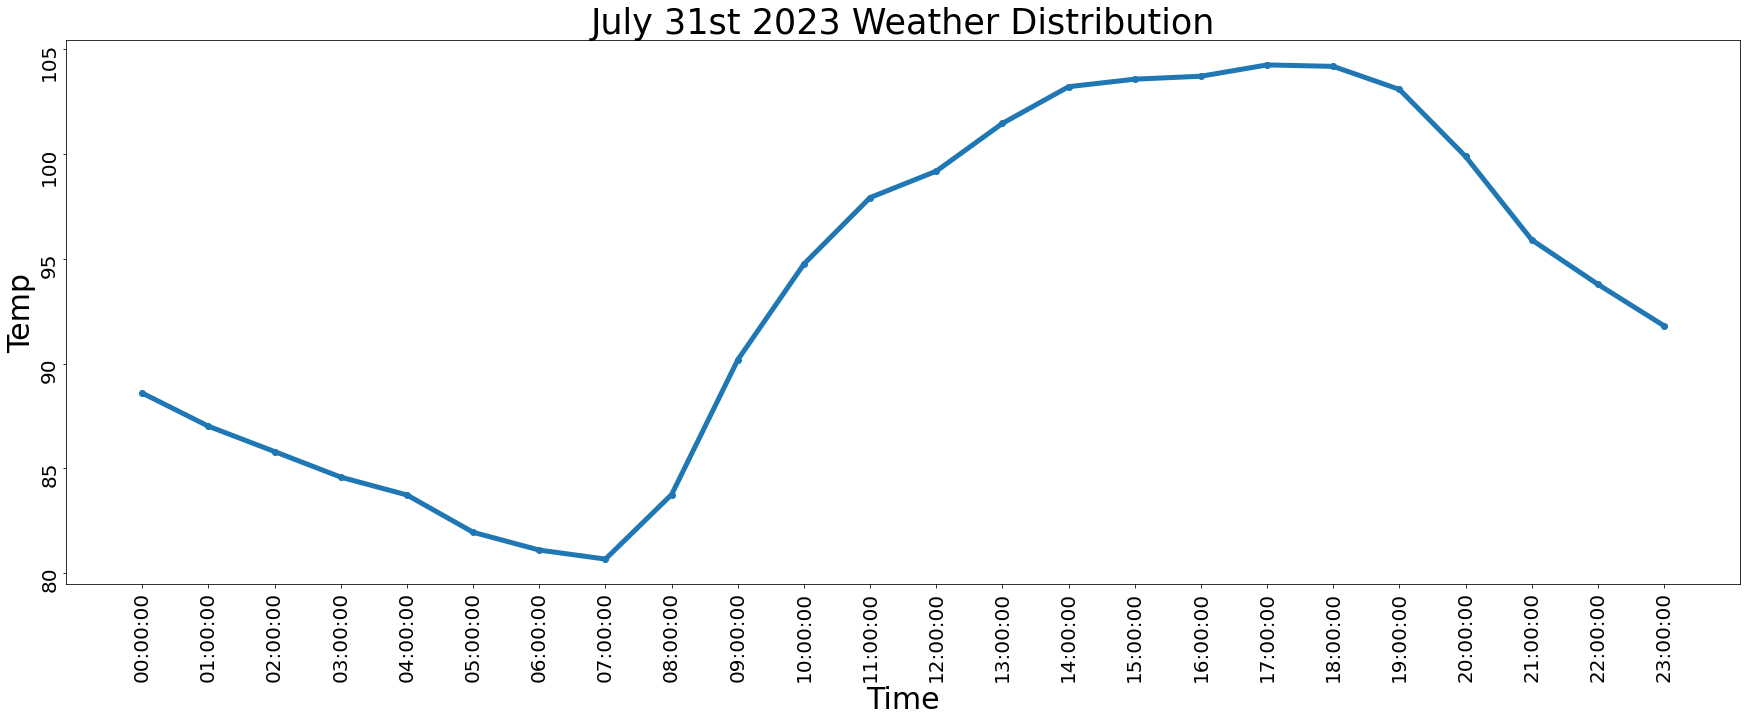

In [85]:
plot_date_weather_distribution(summer_2023, 'date', '2023-07-31', 'time', 'temp', 'July 31st 2023 Weather Distribution')

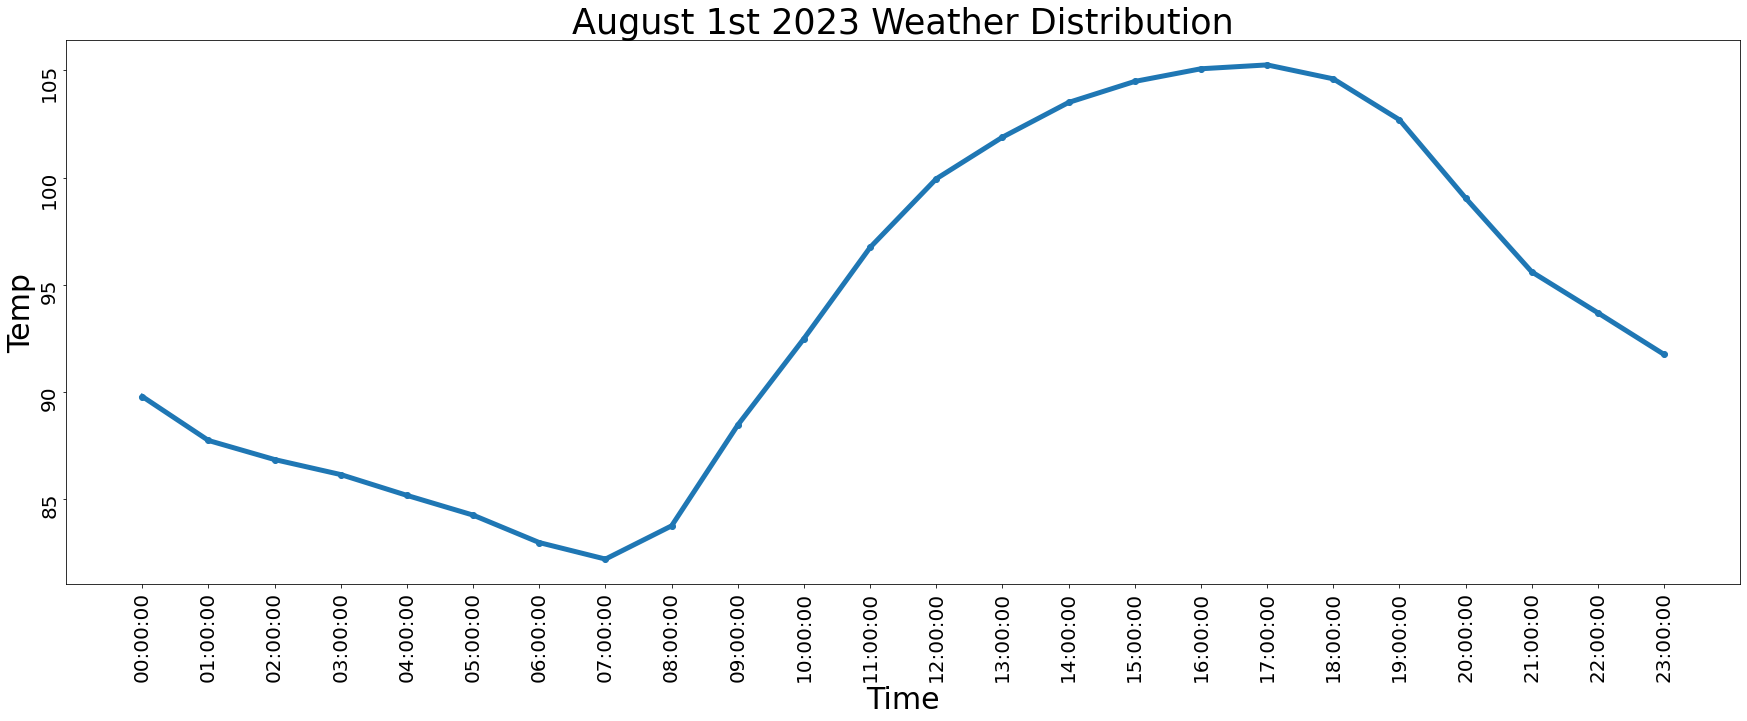

In [86]:
plot_date_weather_distribution(summer_2023, 'date', '2023-08-01', 'time', 'temp', 'August 1st 2023 Weather Distribution')

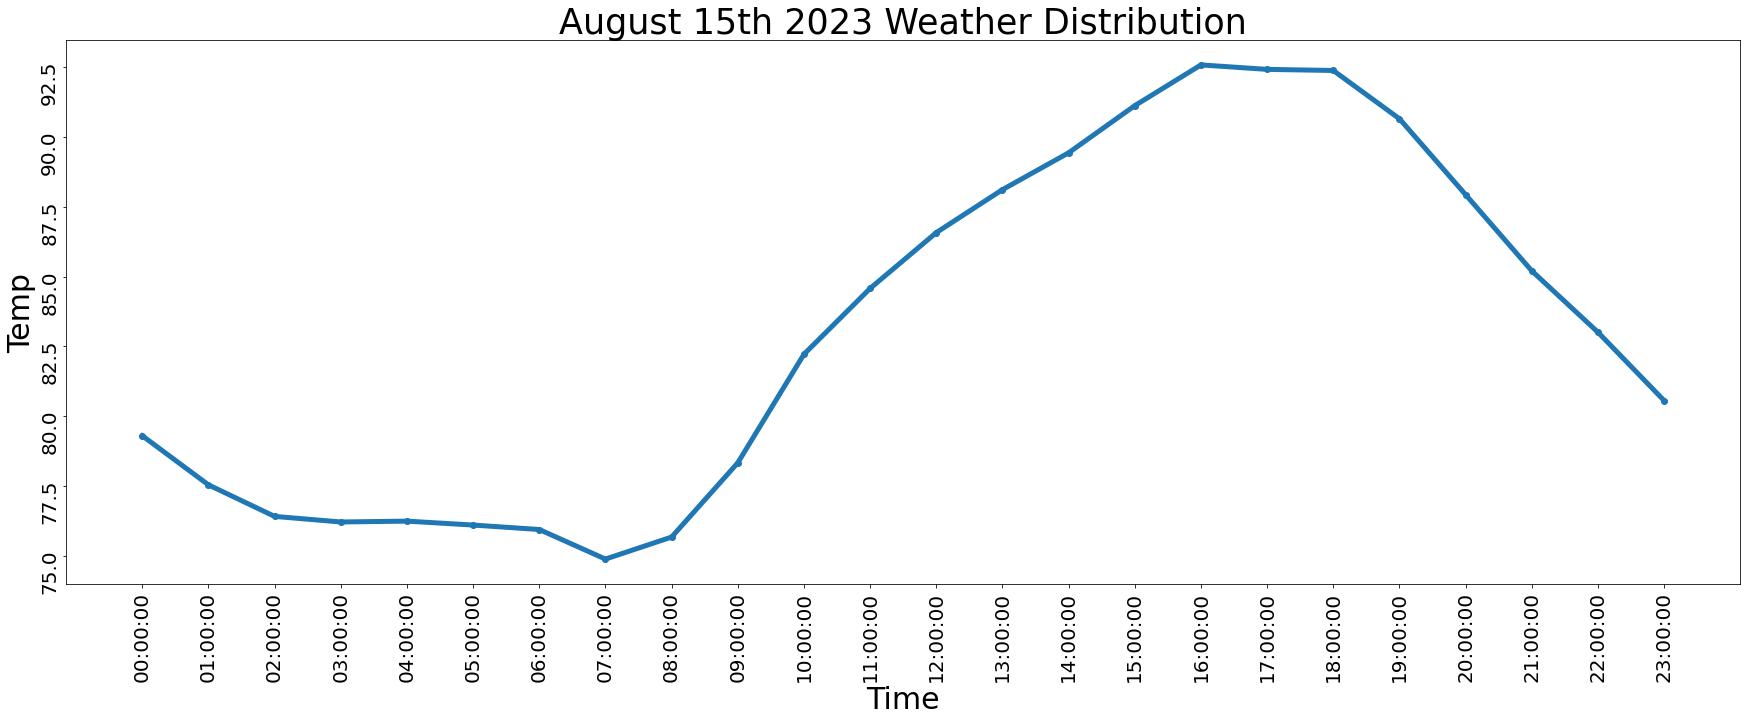

In [87]:
plot_date_weather_distribution(summer_2023, 'date', '2023-08-15', 'time', 'temp', 'August 15th 2023 Weather Distribution')

In [88]:
def get_trend(x, window_size=2):
    current_row = x['index']
    #print(f'Current Row: {current_row}')
    if current_row + window_size + 1 <= summer_2023.shape[0]:
        if summer_2023.iloc[current_row + window_size]['temp'] > x['temp']:
            return '+'
        elif summer_2023.iloc[current_row + window_size]['temp'] < x['temp'] :
            return '-'
        else:
            return 'NC'
    else:
        if summer_2023.iloc[current_row - window_size]['temp'] > x['temp']:
            return '-'
        elif summer_2023.iloc[current_row - window_size]['temp'] < x['temp']:
            return '+'
        else:
            return 'NC'

In [89]:
summer_2023 = summer_2023.reset_index(drop=True)
summer_2023 = summer_2023.reset_index()

In [90]:
summer_2023.shape

(2658, 36)

In [91]:
summer_2023['trend'] = summer_2023.apply(lambda x: get_trend(x), axis='columns')

In [92]:
summer_2023['trend'].value_counts()

-     1533
+     1120
NC       5
Name: trend, dtype: int64

In [93]:
#df.loc[[0, 1], ['email', 'first']]

In [94]:
summer_2023.groupby(['date', 'time']).count()['temp']

date        time    
2023-05-01  00:00:00    1
            01:00:00    1
            02:00:00    1
            03:00:00    1
            04:00:00    1
                       ..
2023-08-19  14:00:00    1
            15:00:00    1
            16:00:00    1
            17:00:00    1
            18:00:00    1
Name: temp, Length: 2658, dtype: int64

In [95]:
summer_2023['hour'] = summer_2023['time'].apply(lambda x: int(x.split(':')[0]))

In [96]:
"""may_1 = summer_2023[summer_2023['date'] == '2023-05-01']
may_1_subset = may_1[['time', 'temp', 'trend']]
x = may_1_subset[may_1_subset['trend'] == '+'].iloc[0]
begin_heat_time = x['time']
begin_heat_row = x._name
x_ = may_1_subset.iloc[begin_heat_row:]
begin_cool_row = x_[x_['trend'] == '-'].iloc[0]
begin_cool_row['time']"""

"may_1 = summer_2023[summer_2023['date'] == '2023-05-01']\nmay_1_subset = may_1[['time', 'temp', 'trend']]\nx = may_1_subset[may_1_subset['trend'] == '+'].iloc[0]\nbegin_heat_time = x['time']\nbegin_heat_row = x._name\nx_ = may_1_subset.iloc[begin_heat_row:]\nbegin_cool_row = x_[x_['trend'] == '-'].iloc[0]\nbegin_cool_row['time']"

In [97]:
"""date_ = summer_2023[summer_2023['date'] == '2023-05-02']
date_ = date_.reset_index(drop=True)
x = date_[date_['trend'] == '+'].iloc[0]
begin_heat_row = x._name
x_ = date_.iloc[begin_heat_row:]
"""

"date_ = summer_2023[summer_2023['date'] == '2023-05-02']\ndate_ = date_.reset_index(drop=True)\nx = date_[date_['trend'] == '+'].iloc[0]\nbegin_heat_row = x._name\nx_ = date_.iloc[begin_heat_row:]\n"

In [98]:
%%time
dates = list(summer_2023.date.unique())
warm_up_start_hours = []
cool_down_start_hours = []

for d in dates:
    date_ = summer_2023[summer_2023['date'] == d]
    date_ = date_.reset_index(drop=True)
    print(f'Date: {d}')
    x = date_[date_['trend'] == '+'].iloc[0]
    begin_heat_time = x['hour']
    print(f'Begin heat time: {begin_heat_time}')
    warm_up_start_hours.append(begin_heat_time)
    begin_heat_row = x._name
    x_ = date_.iloc[begin_heat_row:]
    after_noon = date_[date_['hour'] >= 12]
    begin_cool_row = after_noon[after_noon['trend'] == '-'].iloc[0]
    begin_cool_time = begin_cool_row['hour']
    print(f'Begin cool time: {begin_cool_time}')
    print(f'Date: {d}, warm up time: {begin_heat_time}, cool down start time: {begin_cool_time}')
    cool_down_start_hours.append(begin_cool_time)

Date: 2023-05-01
Begin heat time: 6
Begin cool time: 16
Date: 2023-05-01, warm up time: 6, cool down start time: 16
Date: 2023-05-02
Begin heat time: 6
Begin cool time: 15
Date: 2023-05-02, warm up time: 6, cool down start time: 15
Date: 2023-05-03
Begin heat time: 5
Begin cool time: 15
Date: 2023-05-03, warm up time: 5, cool down start time: 15
Date: 2023-05-04
Begin heat time: 3
Begin cool time: 14
Date: 2023-05-04, warm up time: 3, cool down start time: 14
Date: 2023-05-05
Begin heat time: 6
Begin cool time: 15
Date: 2023-05-05, warm up time: 6, cool down start time: 15
Date: 2023-05-06
Begin heat time: 6
Begin cool time: 13
Date: 2023-05-06, warm up time: 6, cool down start time: 13
Date: 2023-05-07
Begin heat time: 0
Begin cool time: 17
Date: 2023-05-07, warm up time: 0, cool down start time: 17
Date: 2023-05-08
Begin heat time: 0
Begin cool time: 17
Date: 2023-05-08, warm up time: 0, cool down start time: 17
Date: 2023-05-09
Begin heat time: 6
Begin cool time: 13
Date: 2023-05-09

Begin cool time: 16
Date: 2023-07-20, warm up time: 7, cool down start time: 16
Date: 2023-07-21
Begin heat time: 6
Begin cool time: 16
Date: 2023-07-21, warm up time: 6, cool down start time: 16
Date: 2023-07-22
Begin heat time: 7
Begin cool time: 16
Date: 2023-07-22, warm up time: 7, cool down start time: 16
Date: 2023-07-23
Begin heat time: 5
Begin cool time: 16
Date: 2023-07-23, warm up time: 5, cool down start time: 16
Date: 2023-07-24
Begin heat time: 6
Begin cool time: 16
Date: 2023-07-24, warm up time: 6, cool down start time: 16
Date: 2023-07-25
Begin heat time: 6
Begin cool time: 16
Date: 2023-07-25, warm up time: 6, cool down start time: 16
Date: 2023-07-26
Begin heat time: 6
Begin cool time: 16
Date: 2023-07-26, warm up time: 6, cool down start time: 16
Date: 2023-07-27
Begin heat time: 7
Begin cool time: 16
Date: 2023-07-27, warm up time: 7, cool down start time: 16
Date: 2023-07-28
Begin heat time: 6
Begin cool time: 17
Date: 2023-07-28, warm up time: 6, cool down start t

In [99]:
day_cool_down_warm_up_stats = pd.DataFrame({'date':dates, 'warm_up_start_time': warm_up_start_hours, 'cool_down_start_time': cool_down_start_hours})

In [100]:
summer_2023 = summer_2023.merge(day_cool_down_warm_up_stats, on='date', suffixes=(None, None))
summer_2023

,index,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,...,date,time,month,temp_lag_1,abs_temp_diff,temp_diff,trend,hour,warm_up_start_time,cool_down_start_time
0,0,1682917200,2023-05-01 05:00:00 +0000 UTC,-18000,Frisco,33.150674,-96.823612,63.88,NaN,41.58,...,2023-05-01,00:00:00,5,63.88,0.00,0.00,-,0,6,16
1,1,1682920800,2023-05-01 06:00:00 +0000 UTC,-18000,Frisco,33.150674,-96.823612,62.08,NaN,40.51,...,2023-05-01,01:00:00,5,63.88,1.80,-1.80,-,1,6,16
2,2,1682924400,2023-05-01 07:00:00 +0000 UTC,-18000,Frisco,33.150674,-96.823612,61.72,NaN,39.61,...,2023-05-01,02:00:00,5,62.08,0.36,-0.36,-,2,6,16
3,3,1682928000,2023-05-01 08:00:00 +0000 UTC,-18000,Frisco,33.150674,-96.823612,59.45,NaN,39.78,...,2023-05-01,03:00:00,5,61.72,2.27,-2.27,-,3,6,16
4,4,1682931600,2023-05-01 09:00:00 +0000 UTC,-18000,Frisco,33.150674,-96.823612,57.67,NaN,39.69,...,2023-05-01,04:00:00,5,59.45,1.78,-1.78,-,4,6,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2653,2653,1692471600,2023-08-19 19:00:00 +0000 UTC,-18000,Frisco,33.150674,-96.823612,104.43,NaN,67.75,...,2023-08-19,14:00:00,8,102.81,1.62,1.62,+,14,7,16
2654,2654,1692475200,2023-08-19 20:00:00 +0000 UTC,-18000,Frisco,33.150674,-96.823612,106.29,NaN,67.39,...,2023-08-19,15:00:00,8,104.43,1.86,1.86,+,15,7,16
2655,2655,1692478800,2023-08-19 21:00:00 +0000 UTC,-18000,Frisco,33.150674,-96.823612,106.86,NaN,67.87,...,2023-08-19,16:00:00,8,106.29,0.57,0.57,-,16,7,16
2656,2656,1692482400,2023-08-19 22:00:00 +0000 UTC,-18000,Frisco,33.150674,-96.823612,107.40,NaN,66.27,...,2023-08-19,17:00:00,8,106.86,0.54,0.54,+,17,7,16


In [101]:
summer_2023.groupby('month')['warm_up_start_time'].value_counts()

month  warm_up_start_time
5      6                     408
       5                      96
       0                      72
       3                      72
       4                      48
       7                      48
6      6                     408
       5                     120
       4                      72
       1                      48
       7                      48
       0                      24
7      6                     408
       7                     168
       5                      47
       0                      24
       1                      24
       2                      24
       3                      24
       4                      24
8      7                     259
       6                     120
       0                      48
       8                      24
Name: warm_up_start_time, dtype: int64

### Cool Down start time

In [102]:
summer_2023.groupby('month')['cool_down_start_time'].value_counts()

month  cool_down_start_time
5      16                      216
       15                      168
       14                      144
       13                      120
       17                       72
       12                       24
6      15                      216
       16                      216
       17                      144
       14                       72
       12                       24
       13                       24
       18                       24
7      16                      383
       17                      240
       13                       48
       12                       24
       14                       24
       18                       24
8      16                      235
       17                      168
       15                       24
       18                       24
Name: cool_down_start_time, dtype: int64

In [103]:
summer_2023.groupby('month')['cool_down_start_time'].mean()

month
5    14.870968
6    15.533333
7    16.000000
8    16.425721
Name: cool_down_start_time, dtype: float64

In [104]:
summer_2023.columns

Index(['index', 'dt', 'dt_iso', 'timezone', 'city_name', 'lat', 'lon', 'temp',
       'visibility', 'dew_point', 'feels_like', 'temp_min', 'temp_max',
       'pressure', 'sea_level', 'grnd_level', 'humidity', 'wind_speed',
       'wind_deg', 'wind_gust', 'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h',
       'clouds_all', 'weather_id', 'weather_main', 'weather_description',
       'weather_icon', 'cst_timestamp', 'date', 'time', 'month', 'temp_lag_1',
       'abs_temp_diff', 'temp_diff', 'trend', 'hour', 'warm_up_start_time',
       'cool_down_start_time'],
      dtype='object')

How fast does it cool down after the cool down time

In [117]:
def get_cool_down_stats(df, month, time):
    df = df[df['month'] == month]
    cool_down = df[df['hour'] >= time]
    return cool_down['temp_diff'].mean()

In [106]:
months = summer_2023['month'].unique()

In [107]:
may_avg_cool_down_gradient = get_cool_down_stats(summer_2023, 5, 15)
jun_avg_cool_down_gradient = get_cool_down_stats(summer_2023, 6, 16)
july_avg_cool_down_gradient = get_cool_down_stats(summer_2023, 7, 16)
aug_avg_cool_down_gradient = get_cool_down_stats(summer_2023, 8, 16)

[15 16 17 18 19 20 21 22 23]
[16 17 18 19 20 21 22 23]
[16 17 18 19 20 21 22 23]
[16 17 18 19 20 21 22 23]


In [108]:
cool_down_gradients = [may_avg_cool_down_gradient, jun_avg_cool_down_gradient, july_avg_cool_down_gradient, aug_avg_cool_down_gradient]
cool_down_gradients = [round(abs(i), 2) for i in cool_down_gradients]

In [109]:
cool_down_gradients

[1.08, 1.38, 1.25, 1.16]

In [110]:
def get_start_stop_cool_down_temperatures(df, month_col, month, start_hour, stop_hour):
    month_df = df[df['month'] == month]
    start_temperature = round(month_df[month_df['hour'] == start_hour]['temp'].mean(), 2)
    stop_temperature = round(month_df[month_df['hour'] == stop_hour]['temp'].mean(), 2)
    print(f'Start Temperature: {start_temperature}, stop temperature: {stop_temperature}')

In [111]:
get_start_stop_cool_down_temperatures(summer_2023, 'month', 5, 15, 23)

Start Temperature: 83.03, stop temperature: 72.76


In [112]:
get_start_stop_cool_down_temperatures(summer_2023, 'month', 6, 16, 23)

Start Temperature: 92.28, stop temperature: 80.63


In [113]:
get_start_stop_cool_down_temperatures(summer_2023, 'month', 7, 16, 23)

Start Temperature: 97.63, stop temperature: 86.49


In [114]:
get_start_stop_cool_down_temperatures(summer_2023, 'month', 8, 16, 23)

Start Temperature: 102.91, stop temperature: 91.81


This all but confirms that August 2023 is the hottest month for this year

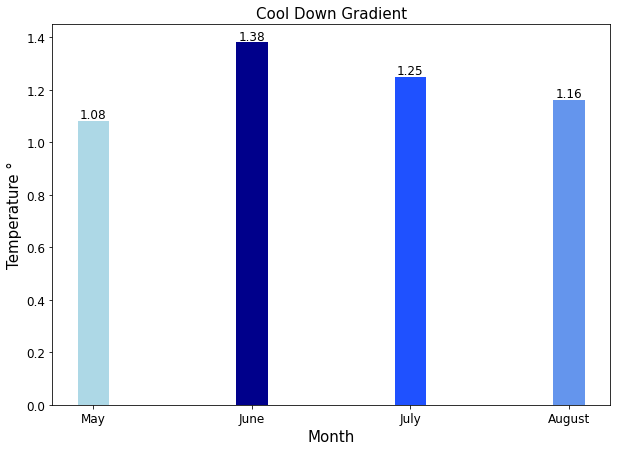

In [115]:
plt.rcParams["figure.figsize"] = (10, 7)
plt.bar(['May', 'June', 'July', 'August'], cool_down_gradients, width=0.2, color=('#ADD8E6', '#00008B', '#1F51FF', '#6495ED'))
x = ['May', 'June', 'July', 'August']
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
y = cool_down_gradients
add_labels(x, y)
plt.title('Cool Down Gradient', fontsize=15)
plt.xlabel('Month', fontsize=15)
plt.ylabel(f'Temperature {degree_sign}', fontsize=15)
plt.show()

May cools down the slowest, but it has the lowest start and stop temperature, August is still scorching, this is the penultimate metric